# Universidad Internacional de Valencia
#### Alumno: Franklin Tixi Cuzco
#### Trabajo Fin de Máster

### Introducción

### Objetivos

### Metodología

###### Generación de conocimiento

###### Automatización de proceso manual

##### Fuentes de datos

### Análisis de datos

Se importan las librerías necesarias.

La libreria FeatureSelector nos permite realizar Cleansing Data por medio de analizar analizar missings, importancia de las variables, correlaciones, etc.

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 0
import matplotlib.pyplot as plt
import plotly.tools as tls
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
import seaborn as sns

# MACHINE LEARNING 
from feature_selector import FeatureSelector # Nos va a ayudar a realizar el número de missings, correlaciones, importancia de las variables, etc.
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# SCIKIT LEARN MODULE:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# METRICS
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score
from sklearn.utils import resample,shuffle

# MODEL TRAINING
from pylab import rcParams
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from collections import Counter


Procedemos a la lectura de los archivos correspondientes a cada una de las 3 ciudades más importantes de la Republica del Ecuador. Para cada ciudad, contamos con un archivo Excel que contiene datos de población económicamente activa con empleo. Todas las tablas poseen datos uniformes ya que se recolectaron en la página oficial de Instituto Nacional de Estadística y Censos. Nuestro objetivo es combinar todas estas tablas para analizar las 3 ciudades y observar las similitudes y diferencias

## DataSet - Requesitos aprobación de credito de consumo

Leemos los archivos de 3 principales entidades bancarias de la Republica del Ecuador. Existe un archivo excel para cada una de ellas, con los datos necesarios para la aprobación de un crédito de consumo personal. Todas las tablas tienen el mismo formato ya que se extrajeron los datos de las páginas web de las entidades bancarias, por lo que nos interesa juntarlas todas para analizar las 3 y ver las diferencias y similitudes entre ellas.

In [2]:
# DEFINICION DE LOS NOMBRES DE ARCHIVOS (DATASET) Y VARIABLES PARA DATASET DE ENTIDADES FINANCIERAS

# VARIABLES
type_file = ".xlsx"
data_path = ".\\Datos\\Dataset\\Bancos\\"
data_path_backup = ".\\Datos\\Backup\\"

# DATASET
data_1_BGR="1-BGR"
data_2_Pacifico="2-Pacifico"

In [3]:
# DATASET PRODUBANCO 
data_1_BGR = pd.read_excel(data_path + data_1_BGR + type_file, header=0, index_col=0)
data_1_BGR['banco']='BGR'

# DATASET PACIFICO 
data_2_Pacifico  = pd.read_excel(data_path + data_2_Pacifico + type_file, header=0, index_col=0)
data_2_Pacifico['banco']='Pacifico'

### Consolidar DataSet

Se procede a consolidar los diferentes dataset de la ciudades en uno solo para obtener una visión mas clara


In [4]:
# CONSOLIDADAR DATASET
dfBanks = [data_1_BGR, data_2_Pacifico]
Banks_EC_Top2 = pd.concat(dfBanks)

# ELIMINAR REGISTROS DUPLICADOS
Banks_EC_Top2 = Banks_EC_Top2.drop_duplicates()

# MOSTRAR REGISTROS 
Banks_EC_Top2

,RequisitosIndependientes,banco
RequisitosDependientes,,
Certificado de trabajo y roles de pago de los 3 últimos meses.,Declaración del impuesto a la renta (últimos 3...,BGR
Copia a color de cédula de identidad.,Declaraciones del IVA (3 últimas declaraciones...,BGR
"Copia de planilla servicios básicos, internet o televisión por cable.",Certificado bancario original de cuenta de aho...,BGR
Edad entre 25 años y 65 años,Copia a color de cédula de identidad.,BGR
Minimo 12 meses de antigüedad,"Copia de planilla servicios básicos, internet ...",BGR
Salario mínimo de 1100 dólares,Soporte de otros ingresos.,BGR
NaN,Edad entre 25 años y 65 años,BGR
"Si tiene otros ingresos, presentar los soportes respectivos.","Copia del RUC, RISE o RIMPE o su equivalente m...",Pacifico
"Copia de cédula de ciudadanía legible y vigente, del deudor y garante si fuera el caso.",Copia de la declaración de impuesto a la renta...,Pacifico


### Respaldar dataset
Salvaguardamos la información mediante un respaldo, exportaremos la consolidación de las 3 ciudades más importantes del Ecuador a un archivo Excel.

In [5]:
Banks_EC_Top2.to_excel(data_path_backup + 'Backup_Banks_EC_Top2' + type_file , index = False)

### Reseteo de index

In [6]:
Banks_EC_Top2 = Banks_EC_Top2.reset_index()
Banks_EC_Top2

,RequisitosDependientes,RequisitosIndependientes,banco
0,Certificado de trabajo y roles de pago de los ...,Declaración del impuesto a la renta (últimos 3...,BGR
1,Copia a color de cédula de identidad.,Declaraciones del IVA (3 últimas declaraciones...,BGR
2,"Copia de planilla servicios básicos, internet ...",Certificado bancario original de cuenta de aho...,BGR
3,Edad entre 25 años y 65 años,Copia a color de cédula de identidad.,BGR
4,Minimo 12 meses de antigüedad,"Copia de planilla servicios básicos, internet ...",BGR
5,Salario mínimo de 1100 dólares,Soporte de otros ingresos.,BGR
6,NaN,Edad entre 25 años y 65 años,BGR
7,"Si tiene otros ingresos, presentar los soporte...","Copia del RUC, RISE o RIMPE o su equivalente m...",Pacifico
8,Copia de cédula de ciudadanía legible y vigent...,Copia de la declaración de impuesto a la renta...,Pacifico
9,Copia de planilla de servicio de básico de su ...,Copia de la declaración del IVA de los 3 últim...,Pacifico


### Eliminación de columna de requisitos como independiente

Se procede a eliminar la columna de requisitos para personas que trabajan de forma independiente ya que no aportan información para el desarrollo del modelo, bajo el criterio del especialista.

Además se procede a eliminar los valores en nulos porque no agrega ningún valor a la investigación

In [7]:
Banks_EC_Top2 = Banks_EC_Top2.dropna()
Banks_EC_Top2 = Banks_EC_Top2.drop(["RequisitosIndependientes"], axis = 1)
Banks_EC_Top2 = Banks_EC_Top2.rename(columns={'RequisitosDependientes': 'requisitos_dependientes'})
Banks_EC_Top2

,requisitos_dependientes,banco
0,Certificado de trabajo y roles de pago de los ...,BGR
1,Copia a color de cédula de identidad.,BGR
2,"Copia de planilla servicios básicos, internet ...",BGR
3,Edad entre 25 años y 65 años,BGR
4,Minimo 12 meses de antigüedad,BGR
5,Salario mínimo de 1100 dólares,BGR
7,"Si tiene otros ingresos, presentar los soporte...",Pacifico
8,Copia de cédula de ciudadanía legible y vigent...,Pacifico
9,Copia de planilla de servicio de básico de su ...,Pacifico
10,Edad entre 22 años y 60 años,Pacifico


## DataSet - Población económicamente activa con empleo

### Importar ciudades

In [8]:
# DEFINICION DE LOS NOMBRES DE ARCHIVOS (DATASET) Y VARIABLES 

# VARIABLES
type_file = ".xlsx"
data_path = ".\\Datos\\Dataset\\Ciudades\\"
data_path_backup = ".\\Datos\\Backup\\"

# DATASET
data_1_Quito="1-Quito"
data_2_Cuenca="2-Cuenca"
data_3_Guayaquil="3-Guayaquil"

In [9]:
# DATASET QUITO 
data_1_Quito = pd.read_excel(data_path + data_1_Quito + type_file, header=0, index_col=0)
data_1_Quito['ciudad']='Quito'

# DATASET CUENCA 
data_2_Cuenca  = pd.read_excel(data_path + data_2_Cuenca + type_file, header=0, index_col=0)
data_2_Cuenca['ciudad']='Cuenca'

# DATASET GUAYAQUIL
data_3_Guayaquil  = pd.read_excel(data_path + data_3_Guayaquil + type_file, header=0, index_col=0)
data_3_Guayaquil['ciudad']='Guayaquil'

### Consolidar DataSet
Se procede a consolidar los diferentes dataset de la ciudades en uno solo para obtener una visión mas clara

In [10]:
# CONSOLIDADAR DATASET
dfCities = [data_1_Quito, data_2_Cuenca, data_3_Guayaquil]
Cities_EC_Top3 = pd.concat(dfCities)

# ELIMINAR REGISTROS DUPLICADOS
Cities_EC_Top3 = Cities_EC_Top3.drop_duplicates()

# MOSTRAR REGISTROS 
Cities_EC_Top3

,sexo,edad,estado_civil,nivel_instruccion,obtuvo_titulo_profesional,titulo_profesional,categoria_ocupacional,trabajo_desempenia,anio_antiguedad,cantidad_trabajos,jornada_trabajo_principal,jornada_trabajo_secundario,salario_principal,gastos,salario_secundario,ingreso_mercado_capitales,ingreso_giros_exterior,ingreso_por_capital,empleo,ciudad
vivienda,,,,,,,,,,,,,,,,,,,,
1,Hombre,55,Casado,Centro de Alfabetización/(EBA),1.0,59999900.0,6.0,NaN,13.0,1.0,20.0,NaN,1100.0,0.0,NaN,NaN,NaN,740.000000,Si,Quito
1,Mujer,55,Soltero,Postgrado,1.0,30720701.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,740.000000,NaN,Quito
1,Mujer,24,Casado,Postgrado,1.0,30230201.0,2.0,2.0,1.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,740.000000,Si,Quito
1,Hombre,55,Casado,Centro de Alfabetización/(EBA),1.0,50310101.0,6.0,NaN,17.0,1.0,6.0,NaN,750.0,70.0,NaN,NaN,NaN,747.666667,Si,Quito
1,Mujer,55,Soltero,Postgrado,1.0,30720701.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,747.666667,NaN,Quito
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,Mujer,45,Union libre,Bachillerato - Educación Media,NaN,NaN,10.0,2.0,6.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,207.000000,Si,Guayaquil
10,Hombre,70,Soltero,Secundario,NaN,NaN,6.0,NaN,40.0,1.0,40.0,NaN,400.0,0.0,NaN,NaN,NaN,207.000000,Si,Guayaquil
10,Mujer,22,Soltero,Postgrado,2.0,NaN,6.0,NaN,2.0,1.0,20.0,NaN,250.0,150.0,NaN,NaN,NaN,207.000000,Si,Guayaquil


### Respaldar dataset
Salvaguardamos la información mediante un respaldo, exportaremos la consolidación de las 3 ciudades más importantes del Ecuador a un archivo Excel.

In [11]:
#Cities_EC_Top3.to_excel(data_path_backup + 'Backup_Cities_EC_Top3' + type_file , index = False)

Para obtener una visión general de los datos, procedemos a visualizar las primeras 5 filas de nuestro conjunto de datos. Esto nos proporciona una idea inicial de la estructura y el contenido de los datos.

In [12]:
Cities_EC_Top3.head()

,sexo,edad,estado_civil,nivel_instruccion,obtuvo_titulo_profesional,titulo_profesional,categoria_ocupacional,trabajo_desempenia,anio_antiguedad,cantidad_trabajos,jornada_trabajo_principal,jornada_trabajo_secundario,salario_principal,gastos,salario_secundario,ingreso_mercado_capitales,ingreso_giros_exterior,ingreso_por_capital,empleo,ciudad
vivienda,,,,,,,,,,,,,,,,,,,,
1,Hombre,55,Casado,Centro de Alfabetización/(EBA),1.0,59999900.0,6.0,NaN,13.0,1.0,20.0,NaN,1100.0,0.0,NaN,NaN,NaN,740.000000,Si,Quito
1,Mujer,55,Soltero,Postgrado,1.0,30720701.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,740.000000,NaN,Quito
1,Mujer,24,Casado,Postgrado,1.0,30230201.0,2.0,2.0,1.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,740.000000,Si,Quito
1,Hombre,55,Casado,Centro de Alfabetización/(EBA),1.0,50310101.0,6.0,NaN,17.0,1.0,6.0,NaN,750.0,70.0,NaN,NaN,NaN,747.666667,Si,Quito
1,Mujer,55,Soltero,Postgrado,1.0,30720701.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,747.666667,NaN,Quito


### Excluir registros sin empleo

Se procede a excluir los registros en el cual el valor de la columna "empleo" es diferente a "Sí", dado que nos enfocaremos únicamente en analizar a las personas que están empleadas.

In [13]:
Cities_EC_Top3 = Cities_EC_Top3[Cities_EC_Top3['empleo'] == 'Si']
Cities_EC_Top3

,sexo,edad,estado_civil,nivel_instruccion,obtuvo_titulo_profesional,titulo_profesional,categoria_ocupacional,trabajo_desempenia,anio_antiguedad,cantidad_trabajos,jornada_trabajo_principal,jornada_trabajo_secundario,salario_principal,gastos,salario_secundario,ingreso_mercado_capitales,ingreso_giros_exterior,ingreso_por_capital,empleo,ciudad
vivienda,,,,,,,,,,,,,,,,,,,,
1,Hombre,55,Casado,Centro de Alfabetización/(EBA),1.0,59999900.0,6.0,NaN,13.0,1.0,20.0,NaN,1100.0,0.0,NaN,NaN,NaN,740.000000,Si,Quito
1,Mujer,24,Casado,Postgrado,1.0,30230201.0,2.0,2.0,1.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,740.000000,Si,Quito
1,Hombre,55,Casado,Centro de Alfabetización/(EBA),1.0,50310101.0,6.0,NaN,17.0,1.0,6.0,NaN,750.0,70.0,NaN,NaN,NaN,747.666667,Si,Quito
1,Mujer,24,Casado,Postgrado,1.0,30230202.0,2.0,2.0,4.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,747.666667,Si,Quito
2,Hombre,38,Casado,Bachillerato - Educación Media,NaN,NaN,6.0,NaN,17.0,1.0,40.0,NaN,500.0,100.0,NaN,NaN,NaN,82.600000,Si,Quito
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,Hombre,46,Casado,Bachillerato - Educación Media,NaN,NaN,2.0,2.0,14.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,701.333333,Si,Guayaquil
9,Hombre,28,Casado,Bachillerato - Educación Media,NaN,NaN,2.0,2.0,8.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,113.750000,Si,Guayaquil
10,Mujer,45,Union libre,Bachillerato - Educación Media,NaN,NaN,10.0,2.0,6.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,207.000000,Si,Guayaquil


### Reseteo de index

In [14]:
Cities_EC_Top3 = Cities_EC_Top3.reset_index()
Cities_EC_Top3

,vivienda,sexo,edad,estado_civil,nivel_instruccion,obtuvo_titulo_profesional,titulo_profesional,categoria_ocupacional,trabajo_desempenia,anio_antiguedad,cantidad_trabajos,jornada_trabajo_principal,jornada_trabajo_secundario,salario_principal,gastos,salario_secundario,ingreso_mercado_capitales,ingreso_giros_exterior,ingreso_por_capital,empleo,ciudad
0,1,Hombre,55,Casado,Centro de Alfabetización/(EBA),1.0,59999900.0,6.0,NaN,13.0,1.0,20.0,NaN,1100.0,0.0,NaN,NaN,NaN,740.000000,Si,Quito
1,1,Mujer,24,Casado,Postgrado,1.0,30230201.0,2.0,2.0,1.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,740.000000,Si,Quito
2,1,Hombre,55,Casado,Centro de Alfabetización/(EBA),1.0,50310101.0,6.0,NaN,17.0,1.0,6.0,NaN,750.0,70.0,NaN,NaN,NaN,747.666667,Si,Quito
3,1,Mujer,24,Casado,Postgrado,1.0,30230202.0,2.0,2.0,4.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,747.666667,Si,Quito
4,2,Hombre,38,Casado,Bachillerato - Educación Media,NaN,NaN,6.0,NaN,17.0,1.0,40.0,NaN,500.0,100.0,NaN,NaN,NaN,82.600000,Si,Quito
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43592,8,Hombre,46,Casado,Bachillerato - Educación Media,NaN,NaN,2.0,2.0,14.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,701.333333,Si,Guayaquil
43593,9,Hombre,28,Casado,Bachillerato - Educación Media,NaN,NaN,2.0,2.0,8.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,113.750000,Si,Guayaquil
43594,10,Mujer,45,Union libre,Bachillerato - Educación Media,NaN,NaN,10.0,2.0,6.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,207.000000,Si,Guayaquil
43595,10,Hombre,70,Soltero,Secundario,NaN,NaN,6.0,NaN,40.0,1.0,40.0,NaN,400.0,0.0,NaN,NaN,NaN,207.000000,Si,Guayaquil


### Revision datos
Efectuamos la consulta de los formatos de las variables empleando el método info(). Otra alternativa para lograrlo es 
utilizando dtypes, que proporciona el tipo de variable (esta opción se utiliza más adelante).

En el conjunto de datos de entrada observamos que existen varias variables numéricas y alfanuméricas

In [15]:
Cities_EC_Top3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43597 entries, 0 to 43596
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   vivienda                    43597 non-null  int64  
 1   sexo                        43597 non-null  object 
 2   edad                        43597 non-null  int64  
 3   estado_civil                39855 non-null  object 
 4   nivel_instruccion           43597 non-null  object 
 5   obtuvo_titulo_profesional   17311 non-null  float64
 6   titulo_profesional          12757 non-null  float64
 7   categoria_ocupacional       43597 non-null  float64
 8   trabajo_desempenia          25208 non-null  float64
 9   anio_antiguedad             43597 non-null  float64
 10  cantidad_trabajos           43597 non-null  float64
 11  jornada_trabajo_principal   43597 non-null  float64
 12  jornada_trabajo_secundario  1473 non-null   float64
 13  salario_principal           163

Tenemos 43597 filas y 21 columnas en nuestro dataset principal

In [16]:
print(Cities_EC_Top3.shape) 

(43597, 21)


Otra manera de visualizar los tipos de variables en nuestro conjunto de datos es mediante el uso de la función dtype.

In [17]:
print(Cities_EC_Top3.dtypes) 

vivienda                        int64
sexo                           object
edad                            int64
estado_civil                   object
nivel_instruccion              object
obtuvo_titulo_profesional     float64
titulo_profesional            float64
categoria_ocupacional         float64
trabajo_desempenia            float64
anio_antiguedad               float64
cantidad_trabajos             float64
jornada_trabajo_principal     float64
jornada_trabajo_secundario    float64
salario_principal             float64
gastos                        float64
salario_secundario            float64
ingreso_mercado_capitales     float64
ingreso_giros_exterior        float64
ingreso_por_capital           float64
empleo                         object
ciudad                         object
dtype: object


A continuación, procedemos a observar los nombres de las columnas en nuestro conjunto de datos.

In [18]:
Cities_EC_Top3.columns

Index(['vivienda', 'sexo', 'edad', 'estado_civil', 'nivel_instruccion',
       'obtuvo_titulo_profesional', 'titulo_profesional',
       'categoria_ocupacional', 'trabajo_desempenia', 'anio_antiguedad',
       'cantidad_trabajos', 'jornada_trabajo_principal',
       'jornada_trabajo_secundario', 'salario_principal', 'gastos',
       'salario_secundario', 'ingreso_mercado_capitales',
       'ingreso_giros_exterior', 'ingreso_por_capital', 'empleo', 'ciudad'],
      dtype='object')

Otra opcion para revisar que variables son numéricas; en el conjunto de datos original los cuales son:

- vivienda, edad, obtuvo_titulo_profesional, titulo_profesional', categoria_ocupacional, trabajo_desempenia,anio_antiguedad', cantidad_trabajos, jornada_trabajo_principal, jornada_trabajo_secundario, salario_principal,gastos, salario_secundario, ingreso_mercado_capitales, ingreso_giros_exterior, ingreso_por_capital

In [19]:
df_numeric = Cities_EC_Top3.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['vivienda' 'edad' 'obtuvo_titulo_profesional' 'titulo_profesional'
 'categoria_ocupacional' 'trabajo_desempenia' 'anio_antiguedad'
 'cantidad_trabajos' 'jornada_trabajo_principal'
 'jornada_trabajo_secundario' 'salario_principal' 'gastos'
 'salario_secundario' 'ingreso_mercado_capitales' 'ingreso_giros_exterior'
 'ingreso_por_capital']


Realizamos lo mismo para determinar que variables no son numéricas

In [20]:
# select non numeric columns
df_non_numeric = Cities_EC_Top3.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['sexo' 'estado_civil' 'nivel_instruccion' 'empleo' 'ciudad']


### Duplicidad de datos

Comprobamos si existen registros duplicados en nuestro conjunto de datos, ya que su presencia podría tener un impacto desproporcionado en el modelo posteriormente.

Por lo tanto, llevamos a cabo la detección de duplicados, y en caso afirmativo se procede a eliminar.

Observamos que no hay registros duplicados en el conjunto de datos.

In [21]:
Cities_EC_Top3.duplicated().value_counts()

False    43597
dtype: int64

### Missing values

Vamos a evaluar la existencia de valores nulos en cada una de las variables del conjunto de datos. Existen diversos métodos para verificar la presencia de datos faltantes. Utilizaremos varios de ellos para obtener la misma información. Esto nos permitirá mostrar que hay múltiples formas de revisar los valores nulos en los datos.

Uno de los métodos es sumar los valores nulos que tiene cada variable, usando la función sum

In [22]:
Cities_EC_Top3.isnull().sum()

vivienda                          0
sexo                              0
edad                              0
estado_civil                   3742
nivel_instruccion                 0
obtuvo_titulo_profesional     26286
titulo_profesional            30840
categoria_ocupacional             0
trabajo_desempenia            18389
anio_antiguedad                   0
cantidad_trabajos                 0
jornada_trabajo_principal         0
jornada_trabajo_secundario    42124
salario_principal             27239
gastos                        27239
salario_secundario            42293
ingreso_mercado_capitales     42679
ingreso_giros_exterior        43163
ingreso_por_capital             201
empleo                            0
ciudad                            0
dtype: int64

#### Missing values - Heatmap
Una alternativa para identificar valores faltantes es emplear un mapa de calor (heatmap), el cual nos representará visualmente en diferentes colores qué columnas contienen más valores nulos. Este gráfico resulta muy útil debido a su naturaleza visual para su comprensión.

<Axes: >

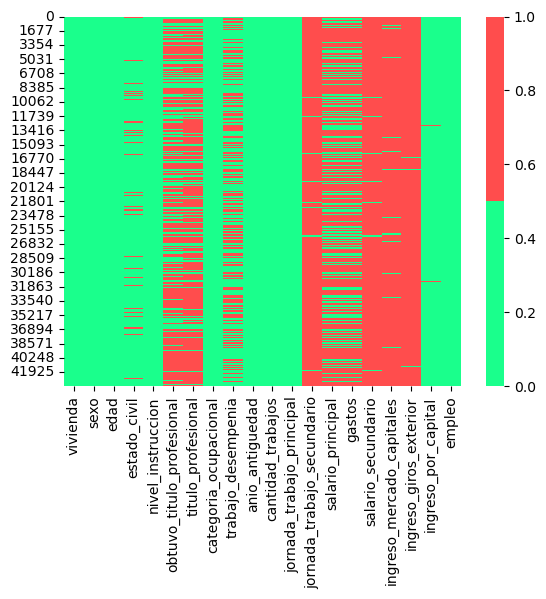

In [23]:
# DEFINIR LOS PARAMETROS DEL MAPA DE CALOR
cols = Cities_EC_Top3.columns[:20] # primeras 20 columnas
colours = ['#1aff8c', '#ff4d4d'] # SE DEFINIR LOS COLORES -  verde para no missing, rojo para missing

# GENERAR EL MAPA DE CALOR CON LOS DATOS MISSING
sns.heatmap(Cities_EC_Top3[cols].isnull(), cmap=sns.color_palette(colours),)

####  Porcentaje - Missing values

A continuación, podemos ver el porcentaje de valores ausentes en cada una de las variables. Para ello, vamos a interar a través de cada una de las columnas de nuestro conjunto de datos usando un bucle for. De esta manera, calcularemos y mostraremos el porcentaje de valores faltantes para cada variable.

vivienda: 0.0%
sexo: 0.0%
edad: 0.0%
estado_civil: 8.58%
nivel_instruccion: 0.0%
obtuvo_titulo_profesional: 60.29%
titulo_profesional: 70.74%
categoria_ocupacional: 0.0%
trabajo_desempenia: 42.18%
anio_antiguedad: 0.0%
cantidad_trabajos: 0.0%
jornada_trabajo_principal: 0.0%
jornada_trabajo_secundario: 96.62%
salario_principal: 62.48%
gastos: 62.48%
salario_secundario: 97.01%
ingreso_mercado_capitales: 97.89%
ingreso_giros_exterior: 99.0%
ingreso_por_capital: 0.46%
empleo: 0.0%
ciudad: 0.0%


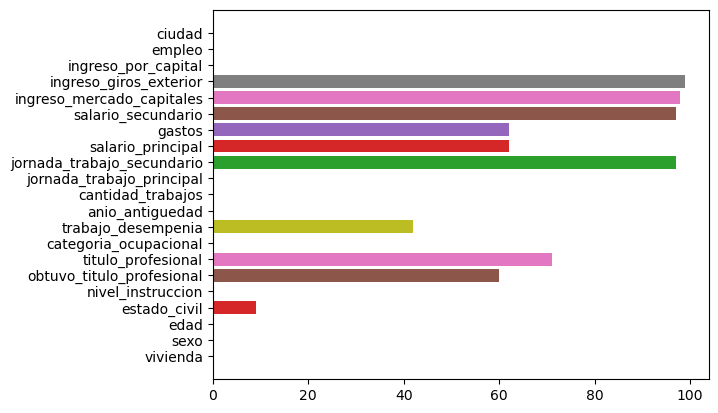

In [24]:
# PORCENTAJE DE DATOS 
for col in Cities_EC_Top3.columns:
    pct_missing = np.mean(Cities_EC_Top3[col].isnull())
    print('{}: {}%'.format(col, round(pct_missing*100, 2)))
    plt.barh(col, round(pct_missing*100))

Otra manera de visualizar el número de valores faltantes es utilizando la función Feature Selector(). A continuación, se presenta un ejemplo de cómo se puede implementar este proceso utilizando nuestra base de datos principal.

In [25]:
fsm = FeatureSelector(data = Cities_EC_Top3, labels = Cities_EC_Top3.columns)

Muestro solo las variables que tienen más de un 80% de valores perdidos. Podemos ver que no tenemos variables con más del 80% de missings

In [26]:
fsm.identify_missing(missing_threshold=0.8)

4 features with greater than 0.80 missing values.



A continuación otro método para ver el porcentaje missings que cotiene las variables

In [27]:
fsm.missing_stats.head()

,missing_fraction
ingreso_giros_exterior,0.990045
ingreso_mercado_capitales,0.978944
salario_secundario,0.970090
jornada_trabajo_secundario,0.966213
titulo_profesional,0.707388


#### Histograma - Missing data

Indicador missing para: estado_civil
Indicador missing para: obtuvo_titulo_profesional
Indicador missing para: titulo_profesional
Indicador missing para: trabajo_desempenia
Indicador missing para: jornada_trabajo_secundario
Indicador missing para: salario_principal
Indicador missing para: gastos
Indicador missing para: salario_secundario
Indicador missing para: ingreso_mercado_capitales
Indicador missing para: ingreso_giros_exterior
Indicador missing para: ingreso_por_capital


<Axes: xlabel='index'>

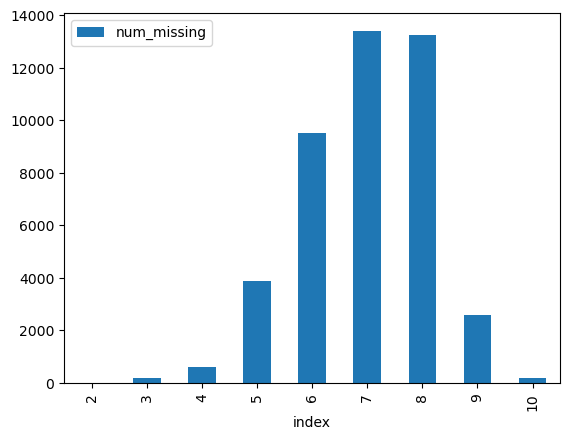

In [28]:
Cities_EC_Top3_Missings = Cities_EC_Top3.copy()
for col in Cities_EC_Top3_Missings.columns:
    missing = Cities_EC_Top3_Missings[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('Indicador missing para: {}'.format(col))
        Cities_EC_Top3_Missings['{}_ismissing'.format(col)] = missing


ismissing_cols = [col for col in Cities_EC_Top3_Missings.columns if 'ismissing' in col]
Cities_EC_Top3_Missings['num_missing'] = Cities_EC_Top3_Missings[ismissing_cols].sum(axis=1)
Cities_EC_Top3_Missings['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Este histograma facilita la identificación de situaciones con valores perdidos. Por ejemplo, se observa que hay más de 12000 instancias con cuatro valores faltantes. Asimismo, se nota que hay una cantidad mínima de instancias con 10 valores faltantes.

### ¿Dejar o no dejar la instancia?

A continuación estudiaremos las filas que tienen muchos missings values. Supongo que si tienen más de 12 missings values esa fila ya no aportaría mucho valor

Vemos que no tenemos ninguna fila con más de 12 valores sin informar

In [29]:
ind_missing = Cities_EC_Top3_Missings[Cities_EC_Top3_Missings['num_missing'] > 12].index
df_less_missing_rows = Cities_EC_Top3_Missings.drop(ind_missing, axis=0)
print(df_less_missing_rows.shape)
df_less_missing_rows

(43597, 33)


,vivienda,sexo,edad,estado_civil,nivel_instruccion,obtuvo_titulo_profesional,titulo_profesional,categoria_ocupacional,trabajo_desempenia,anio_antiguedad,cantidad_trabajos,jornada_trabajo_principal,jornada_trabajo_secundario,salario_principal,gastos,salario_secundario,ingreso_mercado_capitales,ingreso_giros_exterior,ingreso_por_capital,empleo,ciudad,estado_civil_ismissing,obtuvo_titulo_profesional_ismissing,titulo_profesional_ismissing,trabajo_desempenia_ismissing,jornada_trabajo_secundario_ismissing,salario_principal_ismissing,gastos_ismissing,salario_secundario_ismissing,ingreso_mercado_capitales_ismissing,ingreso_giros_exterior_ismissing,ingreso_por_capital_ismissing,num_missing
0,1,Hombre,55,Casado,Centro de Alfabetización/(EBA),1.0,59999900.0,6.0,NaN,13.0,1.0,20.0,NaN,1100.0,0.0,NaN,NaN,NaN,740.000000,Si,Quito,False,False,False,True,True,False,False,True,True,True,False,5
1,1,Mujer,24,Casado,Postgrado,1.0,30230201.0,2.0,2.0,1.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,740.000000,Si,Quito,False,False,False,False,True,True,True,True,True,True,False,6
2,1,Hombre,55,Casado,Centro de Alfabetización/(EBA),1.0,50310101.0,6.0,NaN,17.0,1.0,6.0,NaN,750.0,70.0,NaN,NaN,NaN,747.666667,Si,Quito,False,False,False,True,True,False,False,True,True,True,False,5
3,1,Mujer,24,Casado,Postgrado,1.0,30230202.0,2.0,2.0,4.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,747.666667,Si,Quito,False,False,False,False,True,True,True,True,True,True,False,6
4,2,Hombre,38,Casado,Bachillerato - Educación Media,NaN,NaN,6.0,NaN,17.0,1.0,40.0,NaN,500.0,100.0,NaN,NaN,NaN,82.600000,Si,Quito,False,True,True,True,True,False,False,True,True,True,False,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43592,8,Hombre,46,Casado,Bachillerato - Educación Media,NaN,NaN,2.0,2.0,14.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,701.333333,Si,Guayaquil,False,True,True,False,True,True,True,True,True,True,False,8
43593,9,Hombre,28,Casado,Bachillerato - Educación Media,NaN,NaN,2.0,2.0,8.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,113.750000,Si,Guayaquil,False,True,True,False,True,True,True,True,True,True,False,8
43594,10,Mujer,45,Union libre,Bachillerato - Educación Media,NaN,NaN,10.0,2.0,6.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,207.000000,Si,Guayaquil,False,True,True,False,True,True,True,True,True,True,False,8
43595,10,Hombre,70,Soltero,Secundario,NaN,NaN,6.0,NaN,40.0,1.0,40.0,NaN,400.0,0.0,NaN,NaN,NaN,207.000000,Si,Guayaquil,False,True,True,True,True,False,False,True,True,True,False,7


### ¿Dejar o no dejar la característica?

Con la siguiente función, comprobamos cuales son las variables con más de un 80% de missings. Se procedio a eliminar 4 columnas o caracteristicas que no aportan para el analisis:
- jornada_trabajo_secundario
- salario_secundario
- ingreso_mercado_capitales
- ingreso_giros_exterior

In [30]:
def filter_na(datos, nivelna = 0.8): # Porcentaje de missings por el que queremos filtrar
    por_na = datos.isnull().mean() # calculamos la media
    names =list(por_na[por_na < nivelna].index) #elimina las variables <= que ese valor
    return pd.DataFrame(datos.filter(names, axis = 1))

Cities_EC_Top3=filter_na(Cities_EC_Top3) #devuelve el dataset filtrado

print(Cities_EC_Top3.shape)
Cities_EC_Top3

(43597, 17)


,vivienda,sexo,edad,estado_civil,nivel_instruccion,obtuvo_titulo_profesional,titulo_profesional,categoria_ocupacional,trabajo_desempenia,anio_antiguedad,cantidad_trabajos,jornada_trabajo_principal,salario_principal,gastos,ingreso_por_capital,empleo,ciudad
0,1,Hombre,55,Casado,Centro de Alfabetización/(EBA),1.0,59999900.0,6.0,NaN,13.0,1.0,20.0,1100.0,0.0,740.000000,Si,Quito
1,1,Mujer,24,Casado,Postgrado,1.0,30230201.0,2.0,2.0,1.0,1.0,40.0,NaN,NaN,740.000000,Si,Quito
2,1,Hombre,55,Casado,Centro de Alfabetización/(EBA),1.0,50310101.0,6.0,NaN,17.0,1.0,6.0,750.0,70.0,747.666667,Si,Quito
3,1,Mujer,24,Casado,Postgrado,1.0,30230202.0,2.0,2.0,4.0,1.0,40.0,NaN,NaN,747.666667,Si,Quito
4,2,Hombre,38,Casado,Bachillerato - Educación Media,NaN,NaN,6.0,NaN,17.0,1.0,40.0,500.0,100.0,82.600000,Si,Quito
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43592,8,Hombre,46,Casado,Bachillerato - Educación Media,NaN,NaN,2.0,2.0,14.0,1.0,40.0,NaN,NaN,701.333333,Si,Guayaquil
43593,9,Hombre,28,Casado,Bachillerato - Educación Media,NaN,NaN,2.0,2.0,8.0,1.0,40.0,NaN,NaN,113.750000,Si,Guayaquil
43594,10,Mujer,45,Union libre,Bachillerato - Educación Media,NaN,NaN,10.0,2.0,6.0,1.0,40.0,NaN,NaN,207.000000,Si,Guayaquil
43595,10,Hombre,70,Soltero,Secundario,NaN,NaN,6.0,NaN,40.0,1.0,40.0,400.0,0.0,207.000000,Si,Guayaquil


In [31]:
Cities_EC_Top3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43597 entries, 0 to 43596
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   vivienda                   43597 non-null  int64  
 1   sexo                       43597 non-null  object 
 2   edad                       43597 non-null  int64  
 3   estado_civil               39855 non-null  object 
 4   nivel_instruccion          43597 non-null  object 
 5   obtuvo_titulo_profesional  17311 non-null  float64
 6   titulo_profesional         12757 non-null  float64
 7   categoria_ocupacional      43597 non-null  float64
 8   trabajo_desempenia         25208 non-null  float64
 9   anio_antiguedad            43597 non-null  float64
 10  cantidad_trabajos          43597 non-null  float64
 11  jornada_trabajo_principal  43597 non-null  float64
 12  salario_principal          16358 non-null  float64
 13  gastos                     16358 non-null  flo

### Undersampling y Oversampling

Examinamos si nuestro conjunto de datos está balanceado por ciudades observando el número de filas correspondientes a cada una de ellas. Se evidencia que el dataset está un poco desbalanceado, ya que por ejemplo, hay 23679 filas de Cuenca     mientras que de Guayaquil tenemos 35408. Podemos considerar el uso de técnicas de oversampling para aumentar el número de registros de Cuenca si necesitamos más datos para entrenar el modelo.

In [32]:
Cities_EC_Top3.groupby(['ciudad'])['ciudad'].count()

ciudad
Cuenca       11835
Guayaquil    16199
Quito        15563
Name: ciudad, dtype: int64

<Axes: >

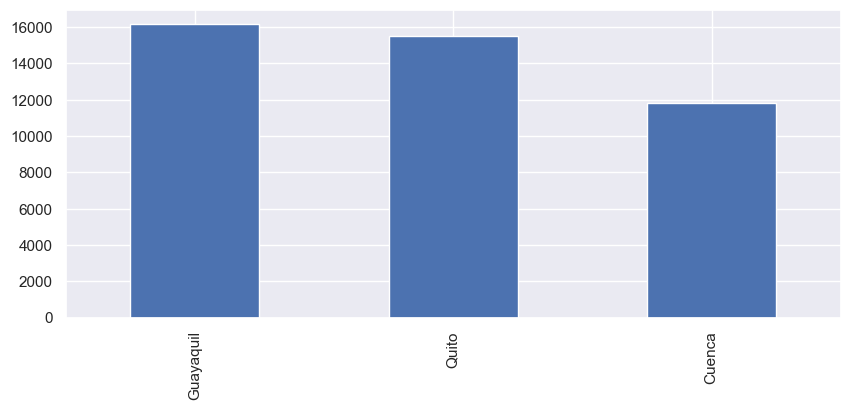

In [85]:
# bar chart -  distribution of a categorical variable
fig = plt.figure(figsize =(10, 4))
Cities_EC_Top3['ciudad'].value_counts().plot.bar()

### Estadandarización de los valores

Inicio la transformación del formato de las variables en el conjunto de datos para facilitar un análisis más efectivo de las correlaciones entre variables. Dado que hay varias variables que no son numéricas, estoy convirtiéndolas en variables numéricas para mejorar su análisis.

In [34]:
Cities_EC_Top3

,vivienda,sexo,edad,estado_civil,nivel_instruccion,obtuvo_titulo_profesional,titulo_profesional,categoria_ocupacional,trabajo_desempenia,anio_antiguedad,cantidad_trabajos,jornada_trabajo_principal,salario_principal,gastos,ingreso_por_capital,empleo,ciudad
0,1,Hombre,55,Casado,Centro de Alfabetización/(EBA),1.0,59999900.0,6.0,NaN,13.0,1.0,20.0,1100.0,0.0,740.000000,Si,Quito
1,1,Mujer,24,Casado,Postgrado,1.0,30230201.0,2.0,2.0,1.0,1.0,40.0,NaN,NaN,740.000000,Si,Quito
2,1,Hombre,55,Casado,Centro de Alfabetización/(EBA),1.0,50310101.0,6.0,NaN,17.0,1.0,6.0,750.0,70.0,747.666667,Si,Quito
3,1,Mujer,24,Casado,Postgrado,1.0,30230202.0,2.0,2.0,4.0,1.0,40.0,NaN,NaN,747.666667,Si,Quito
4,2,Hombre,38,Casado,Bachillerato - Educación Media,NaN,NaN,6.0,NaN,17.0,1.0,40.0,500.0,100.0,82.600000,Si,Quito
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43592,8,Hombre,46,Casado,Bachillerato - Educación Media,NaN,NaN,2.0,2.0,14.0,1.0,40.0,NaN,NaN,701.333333,Si,Guayaquil
43593,9,Hombre,28,Casado,Bachillerato - Educación Media,NaN,NaN,2.0,2.0,8.0,1.0,40.0,NaN,NaN,113.750000,Si,Guayaquil
43594,10,Mujer,45,Union libre,Bachillerato - Educación Media,NaN,NaN,10.0,2.0,6.0,1.0,40.0,NaN,NaN,207.000000,Si,Guayaquil
43595,10,Hombre,70,Soltero,Secundario,NaN,NaN,6.0,NaN,40.0,1.0,40.0,400.0,0.0,207.000000,Si,Guayaquil


Eliminación de las variables "empleo" del conjunto de datos, ya que todos los registros corresponden a personas que tienen empleo y esta columna no aporta información adicional relevante. Eliminación de la columna "titulo_profesional" del conjunto de dato, ya que no aporta valor a nuestro analisis (criterio experto). Eliminaciónd de la columna "obtuvo_titulo_profesional" del conjunto de dato, ya que no aporta valor a nuestro analisis (criterio experto).

In [35]:
Cities_EC_Top3 = Cities_EC_Top3.drop(["empleo"], axis = 1)
Cities_EC_Top3 = Cities_EC_Top3.drop(["titulo_profesional"], axis = 1)
Cities_EC_Top3 = Cities_EC_Top3.drop(["obtuvo_titulo_profesional"], axis = 1)
Cities_EC_Top3

,vivienda,sexo,edad,estado_civil,nivel_instruccion,categoria_ocupacional,trabajo_desempenia,anio_antiguedad,cantidad_trabajos,jornada_trabajo_principal,salario_principal,gastos,ingreso_por_capital,ciudad
0,1,Hombre,55,Casado,Centro de Alfabetización/(EBA),6.0,NaN,13.0,1.0,20.0,1100.0,0.0,740.000000,Quito
1,1,Mujer,24,Casado,Postgrado,2.0,2.0,1.0,1.0,40.0,NaN,NaN,740.000000,Quito
2,1,Hombre,55,Casado,Centro de Alfabetización/(EBA),6.0,NaN,17.0,1.0,6.0,750.0,70.0,747.666667,Quito
3,1,Mujer,24,Casado,Postgrado,2.0,2.0,4.0,1.0,40.0,NaN,NaN,747.666667,Quito
4,2,Hombre,38,Casado,Bachillerato - Educación Media,6.0,NaN,17.0,1.0,40.0,500.0,100.0,82.600000,Quito
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43592,8,Hombre,46,Casado,Bachillerato - Educación Media,2.0,2.0,14.0,1.0,40.0,NaN,NaN,701.333333,Guayaquil
43593,9,Hombre,28,Casado,Bachillerato - Educación Media,2.0,2.0,8.0,1.0,40.0,NaN,NaN,113.750000,Guayaquil
43594,10,Mujer,45,Union libre,Bachillerato - Educación Media,10.0,2.0,6.0,1.0,40.0,NaN,NaN,207.000000,Guayaquil
43595,10,Hombre,70,Soltero,Secundario,6.0,NaN,40.0,1.0,40.0,400.0,0.0,207.000000,Guayaquil


Se procede a setear en 0 los valores nulos de las columnas para evitar datos null y que esto afecte al entrenamiento del modelo.

In [36]:
Cities_EC_Top3['anio_antiguedad']=Cities_EC_Top3['anio_antiguedad'].fillna('0')
Cities_EC_Top3['edad']=Cities_EC_Top3['edad'].fillna('0')
Cities_EC_Top3['cantidad_trabajos']=Cities_EC_Top3['cantidad_trabajos'].fillna('0')
Cities_EC_Top3['jornada_trabajo_principal']=Cities_EC_Top3['jornada_trabajo_principal'].fillna('0')
Cities_EC_Top3['salario_principal']=Cities_EC_Top3['salario_principal'].fillna('0')
Cities_EC_Top3['gastos']=Cities_EC_Top3['gastos'].fillna('0')
Cities_EC_Top3['trabajo_desempenia']=Cities_EC_Top3['trabajo_desempenia'].fillna('0')
Cities_EC_Top3

,vivienda,sexo,edad,estado_civil,nivel_instruccion,categoria_ocupacional,trabajo_desempenia,anio_antiguedad,cantidad_trabajos,jornada_trabajo_principal,salario_principal,gastos,ingreso_por_capital,ciudad
0,1,Hombre,55,Casado,Centro de Alfabetización/(EBA),6.0,0,13.0,1.0,20.0,1100.0,0.0,740.000000,Quito
1,1,Mujer,24,Casado,Postgrado,2.0,2.0,1.0,1.0,40.0,0,0,740.000000,Quito
2,1,Hombre,55,Casado,Centro de Alfabetización/(EBA),6.0,0,17.0,1.0,6.0,750.0,70.0,747.666667,Quito
3,1,Mujer,24,Casado,Postgrado,2.0,2.0,4.0,1.0,40.0,0,0,747.666667,Quito
4,2,Hombre,38,Casado,Bachillerato - Educación Media,6.0,0,17.0,1.0,40.0,500.0,100.0,82.600000,Quito
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43592,8,Hombre,46,Casado,Bachillerato - Educación Media,2.0,2.0,14.0,1.0,40.0,0,0,701.333333,Guayaquil
43593,9,Hombre,28,Casado,Bachillerato - Educación Media,2.0,2.0,8.0,1.0,40.0,0,0,113.750000,Guayaquil
43594,10,Mujer,45,Union libre,Bachillerato - Educación Media,10.0,2.0,6.0,1.0,40.0,0,0,207.000000,Guayaquil
43595,10,Hombre,70,Soltero,Secundario,6.0,0,40.0,1.0,40.0,400.0,0.0,207.000000,Guayaquil


In [37]:
Cities_EC_Top3['ingreso_por_capital']=Cities_EC_Top3['ingreso_por_capital'].round(2)
Cities_EC_Top3

,vivienda,sexo,edad,estado_civil,nivel_instruccion,categoria_ocupacional,trabajo_desempenia,anio_antiguedad,cantidad_trabajos,jornada_trabajo_principal,salario_principal,gastos,ingreso_por_capital,ciudad
0,1,Hombre,55,Casado,Centro de Alfabetización/(EBA),6.0,0,13.0,1.0,20.0,1100.0,0.0,740.00,Quito
1,1,Mujer,24,Casado,Postgrado,2.0,2.0,1.0,1.0,40.0,0,0,740.00,Quito
2,1,Hombre,55,Casado,Centro de Alfabetización/(EBA),6.0,0,17.0,1.0,6.0,750.0,70.0,747.67,Quito
3,1,Mujer,24,Casado,Postgrado,2.0,2.0,4.0,1.0,40.0,0,0,747.67,Quito
4,2,Hombre,38,Casado,Bachillerato - Educación Media,6.0,0,17.0,1.0,40.0,500.0,100.0,82.60,Quito
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43592,8,Hombre,46,Casado,Bachillerato - Educación Media,2.0,2.0,14.0,1.0,40.0,0,0,701.33,Guayaquil
43593,9,Hombre,28,Casado,Bachillerato - Educación Media,2.0,2.0,8.0,1.0,40.0,0,0,113.75,Guayaquil
43594,10,Mujer,45,Union libre,Bachillerato - Educación Media,10.0,2.0,6.0,1.0,40.0,0,0,207.00,Guayaquil
43595,10,Hombre,70,Soltero,Secundario,6.0,0,40.0,1.0,40.0,400.0,0.0,207.00,Guayaquil


Transformar los años en mese en el campo anio_antiguedad ya que los banco usan ese campo por meses como requesitos para realizar un prestamo

In [38]:
Cities_EC_Top3['meses_antiguedad'] = Cities_EC_Top3['anio_antiguedad']*12
Cities_EC_Top3

,vivienda,sexo,edad,estado_civil,nivel_instruccion,categoria_ocupacional,trabajo_desempenia,anio_antiguedad,cantidad_trabajos,jornada_trabajo_principal,salario_principal,gastos,ingreso_por_capital,ciudad,meses_antiguedad
0,1,Hombre,55,Casado,Centro de Alfabetización/(EBA),6.0,0,13.0,1.0,20.0,1100.0,0.0,740.00,Quito,156.0
1,1,Mujer,24,Casado,Postgrado,2.0,2.0,1.0,1.0,40.0,0,0,740.00,Quito,12.0
2,1,Hombre,55,Casado,Centro de Alfabetización/(EBA),6.0,0,17.0,1.0,6.0,750.0,70.0,747.67,Quito,204.0
3,1,Mujer,24,Casado,Postgrado,2.0,2.0,4.0,1.0,40.0,0,0,747.67,Quito,48.0
4,2,Hombre,38,Casado,Bachillerato - Educación Media,6.0,0,17.0,1.0,40.0,500.0,100.0,82.60,Quito,204.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43592,8,Hombre,46,Casado,Bachillerato - Educación Media,2.0,2.0,14.0,1.0,40.0,0,0,701.33,Guayaquil,168.0
43593,9,Hombre,28,Casado,Bachillerato - Educación Media,2.0,2.0,8.0,1.0,40.0,0,0,113.75,Guayaquil,96.0
43594,10,Mujer,45,Union libre,Bachillerato - Educación Media,10.0,2.0,6.0,1.0,40.0,0,0,207.00,Guayaquil,72.0
43595,10,Hombre,70,Soltero,Secundario,6.0,0,40.0,1.0,40.0,400.0,0.0,207.00,Guayaquil,480.0


Se procede a eliminar la columna "anio_antiguedad" ya que no aporta valor al entrenamiento

In [39]:
Cities_EC_Top3 = Cities_EC_Top3.drop(['anio_antiguedad'], axis = 1)
Cities_EC_Top3.head()

,vivienda,sexo,edad,estado_civil,nivel_instruccion,categoria_ocupacional,trabajo_desempenia,cantidad_trabajos,jornada_trabajo_principal,salario_principal,gastos,ingreso_por_capital,ciudad,meses_antiguedad
0,1,Hombre,55,Casado,Centro de Alfabetización/(EBA),6.0,0,1.0,20.0,1100.0,0.0,740.00,Quito,156.0
1,1,Mujer,24,Casado,Postgrado,2.0,2.0,1.0,40.0,0,0,740.00,Quito,12.0
2,1,Hombre,55,Casado,Centro de Alfabetización/(EBA),6.0,0,1.0,6.0,750.0,70.0,747.67,Quito,204.0
3,1,Mujer,24,Casado,Postgrado,2.0,2.0,1.0,40.0,0,0,747.67,Quito,48.0
4,2,Hombre,38,Casado,Bachillerato - Educación Media,6.0,0,1.0,40.0,500.0,100.0,82.60,Quito,204.0


Convertir en numerico el salario principal

In [40]:
Cities_EC_Top3['salario_principal']=pd.to_numeric(Cities_EC_Top3['salario_principal'])
Cities_EC_Top3['gastos']=pd.to_numeric(Cities_EC_Top3['gastos'])
Cities_EC_Top3

,vivienda,sexo,edad,estado_civil,nivel_instruccion,categoria_ocupacional,trabajo_desempenia,cantidad_trabajos,jornada_trabajo_principal,salario_principal,gastos,ingreso_por_capital,ciudad,meses_antiguedad
0,1,Hombre,55,Casado,Centro de Alfabetización/(EBA),6.0,0,1.0,20.0,1100.0,0.0,740.00,Quito,156.0
1,1,Mujer,24,Casado,Postgrado,2.0,2.0,1.0,40.0,0.0,0.0,740.00,Quito,12.0
2,1,Hombre,55,Casado,Centro de Alfabetización/(EBA),6.0,0,1.0,6.0,750.0,70.0,747.67,Quito,204.0
3,1,Mujer,24,Casado,Postgrado,2.0,2.0,1.0,40.0,0.0,0.0,747.67,Quito,48.0
4,2,Hombre,38,Casado,Bachillerato - Educación Media,6.0,0,1.0,40.0,500.0,100.0,82.60,Quito,204.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43592,8,Hombre,46,Casado,Bachillerato - Educación Media,2.0,2.0,1.0,40.0,0.0,0.0,701.33,Guayaquil,168.0
43593,9,Hombre,28,Casado,Bachillerato - Educación Media,2.0,2.0,1.0,40.0,0.0,0.0,113.75,Guayaquil,96.0
43594,10,Mujer,45,Union libre,Bachillerato - Educación Media,10.0,2.0,1.0,40.0,0.0,0.0,207.00,Guayaquil,72.0
43595,10,Hombre,70,Soltero,Secundario,6.0,0,1.0,40.0,400.0,0.0,207.00,Guayaquil,480.0


In [41]:
# COLUMNA DE SEXO
Cities_EC_Top3.sexo = Cities_EC_Top3.sexo.replace({"Hombre":1, "Mujer":2})

In [42]:
# COLUMNA DE ESTADO CIVIL
Cities_EC_Top3['estado_civil']=Cities_EC_Top3['estado_civil'].fillna('0')
Cities_EC_Top3['ingreso_por_capital']=Cities_EC_Top3['ingreso_por_capital'].fillna('0')
Cities_EC_Top3.estado_civil = Cities_EC_Top3.estado_civil.replace({"Casado":1, "Otro":2, "Otro":3, "Union libre":5, "Union libre":5, "Soltero":6})
Cities_EC_Top3

,vivienda,sexo,edad,estado_civil,nivel_instruccion,categoria_ocupacional,trabajo_desempenia,cantidad_trabajos,jornada_trabajo_principal,salario_principal,gastos,ingreso_por_capital,ciudad,meses_antiguedad
0,1,1,55,1,Centro de Alfabetización/(EBA),6.0,0,1.0,20.0,1100.0,0.0,740.0,Quito,156.0
1,1,2,24,1,Postgrado,2.0,2.0,1.0,40.0,0.0,0.0,740.0,Quito,12.0
2,1,1,55,1,Centro de Alfabetización/(EBA),6.0,0,1.0,6.0,750.0,70.0,747.67,Quito,204.0
3,1,2,24,1,Postgrado,2.0,2.0,1.0,40.0,0.0,0.0,747.67,Quito,48.0
4,2,1,38,1,Bachillerato - Educación Media,6.0,0,1.0,40.0,500.0,100.0,82.6,Quito,204.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43592,8,1,46,1,Bachillerato - Educación Media,2.0,2.0,1.0,40.0,0.0,0.0,701.33,Guayaquil,168.0
43593,9,1,28,1,Bachillerato - Educación Media,2.0,2.0,1.0,40.0,0.0,0.0,113.75,Guayaquil,96.0
43594,10,2,45,5,Bachillerato - Educación Media,10.0,2.0,1.0,40.0,0.0,0.0,207.0,Guayaquil,72.0
43595,10,1,70,6,Secundario,6.0,0,1.0,40.0,400.0,0.0,207.0,Guayaquil,480.0


### Agregar variables adicionales
Ahora procederé a agregar variables adicionales a nuestro conjunto de datos para enriquecer nuestra predicción y obtener conclusiones más sólidas basadas en un conjunto más amplio de variables significativas.

Este dataset no tiene valores missings, los hemos cogido manualmente de las siguientes páginas webs:

- https://www.cip.org.ec/2023/12/15/el-aumento-del-sbu-para-2024/

In [43]:
Cities_EC_Top3['SBU'] = 460
Cities_EC_Top3

,vivienda,sexo,edad,estado_civil,nivel_instruccion,categoria_ocupacional,trabajo_desempenia,cantidad_trabajos,jornada_trabajo_principal,salario_principal,gastos,ingreso_por_capital,ciudad,meses_antiguedad,SBU
0,1,1,55,1,Centro de Alfabetización/(EBA),6.0,0,1.0,20.0,1100.0,0.0,740.0,Quito,156.0,460
1,1,2,24,1,Postgrado,2.0,2.0,1.0,40.0,0.0,0.0,740.0,Quito,12.0,460
2,1,1,55,1,Centro de Alfabetización/(EBA),6.0,0,1.0,6.0,750.0,70.0,747.67,Quito,204.0,460
3,1,2,24,1,Postgrado,2.0,2.0,1.0,40.0,0.0,0.0,747.67,Quito,48.0,460
4,2,1,38,1,Bachillerato - Educación Media,6.0,0,1.0,40.0,500.0,100.0,82.6,Quito,204.0,460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43592,8,1,46,1,Bachillerato - Educación Media,2.0,2.0,1.0,40.0,0.0,0.0,701.33,Guayaquil,168.0,460
43593,9,1,28,1,Bachillerato - Educación Media,2.0,2.0,1.0,40.0,0.0,0.0,113.75,Guayaquil,96.0,460
43594,10,2,45,5,Bachillerato - Educación Media,10.0,2.0,1.0,40.0,0.0,0.0,207.0,Guayaquil,72.0,460
43595,10,1,70,6,Secundario,6.0,0,1.0,40.0,400.0,0.0,207.0,Guayaquil,480.0,460


## Analizamos outliers

Hacemos un gráfico de boxplot donde se pueden ver fácilmente las variables que tienen mucha variabilidad.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'vivienda'),
  Text(1, 0, 'sexo'),
  Text(2, 0, 'edad'),
  Text(3, 0, 'categoria_ocupacional'),
  Text(4, 0, 'cantidad_trabajos'),
  Text(5, 0, 'jornada_trabajo_principal'),
  Text(6, 0, 'salario_principal'),
  Text(7, 0, 'gastos'),
  Text(8, 0, 'meses_antiguedad'),
  Text(9, 0, 'SBU')])

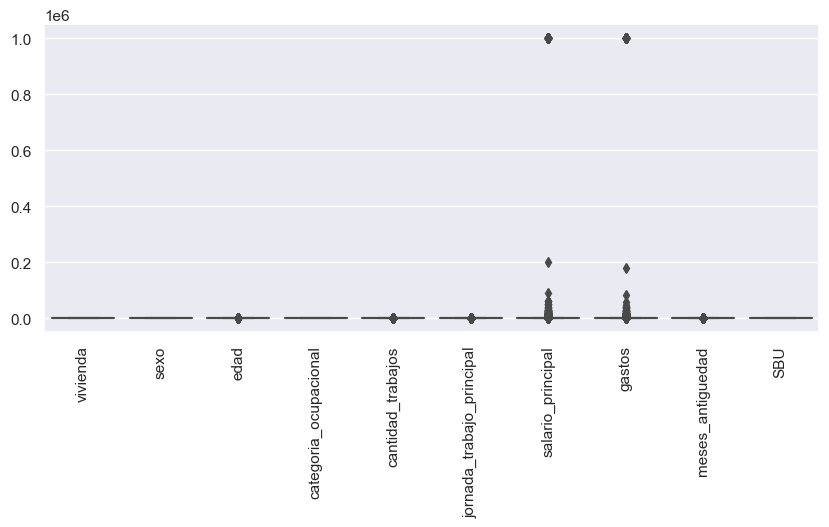

In [44]:
sns.set(rc={'figure.figsize':(10,4)})
sns.boxplot(data=Cities_EC_Top3)
plt.xticks(rotation=90)

Podemos ver que hay un outlier en el salario de los clientes ya que existen observaciones de clientes con 999 999.

{'whiskers': [<matplotlib.lines.Line2D at 0x1c9b66a37f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c9b66a3d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c9b66a3550>],
 'medians': [<matplotlib.lines.Line2D at 0x1c9b66e42b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c9b66e4550>],
 'means': []}

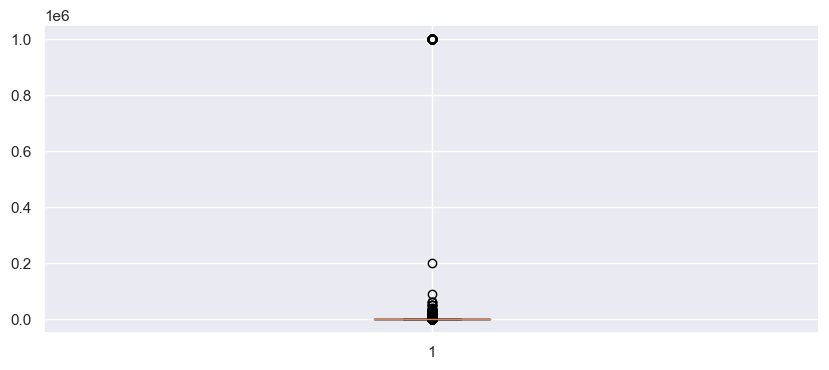

In [45]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  
fig = plt.figure(figsize =(10, 4))
plt.boxplot(Cities_EC_Top3['salario_principal'])

Procedemos a eliminar el registro que es un outlier mayores a 100 000.

In [46]:
Cities_EC_Top3=Cities_EC_Top3[Cities_EC_Top3['salario_principal']<100000]
Cities_EC_Top3

,vivienda,sexo,edad,estado_civil,nivel_instruccion,categoria_ocupacional,trabajo_desempenia,cantidad_trabajos,jornada_trabajo_principal,salario_principal,gastos,ingreso_por_capital,ciudad,meses_antiguedad,SBU
0,1,1,55,1,Centro de Alfabetización/(EBA),6.0,0,1.0,20.0,1100.0,0.0,740.0,Quito,156.0,460
1,1,2,24,1,Postgrado,2.0,2.0,1.0,40.0,0.0,0.0,740.0,Quito,12.0,460
2,1,1,55,1,Centro de Alfabetización/(EBA),6.0,0,1.0,6.0,750.0,70.0,747.67,Quito,204.0,460
3,1,2,24,1,Postgrado,2.0,2.0,1.0,40.0,0.0,0.0,747.67,Quito,48.0,460
4,2,1,38,1,Bachillerato - Educación Media,6.0,0,1.0,40.0,500.0,100.0,82.6,Quito,204.0,460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43592,8,1,46,1,Bachillerato - Educación Media,2.0,2.0,1.0,40.0,0.0,0.0,701.33,Guayaquil,168.0,460
43593,9,1,28,1,Bachillerato - Educación Media,2.0,2.0,1.0,40.0,0.0,0.0,113.75,Guayaquil,96.0,460
43594,10,2,45,5,Bachillerato - Educación Media,10.0,2.0,1.0,40.0,0.0,0.0,207.0,Guayaquil,72.0,460
43595,10,1,70,6,Secundario,6.0,0,1.0,40.0,400.0,0.0,207.0,Guayaquil,480.0,460


Observamos que ya no tenemos outlier para salario_principal

{'whiskers': [<matplotlib.lines.Line2D at 0x1c9b6692590>,
 'caps': [<matplotlib.lines.Line2D at 0x1c9b6692ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c9b66922f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c9b6693010>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c9b66932b0>],
 'means': []}

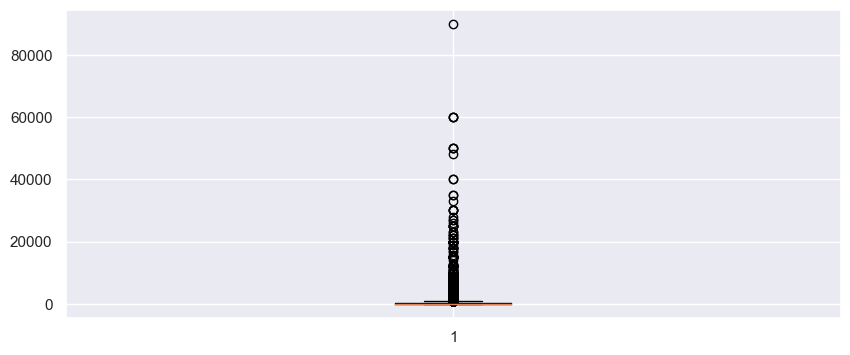

In [47]:
%matplotlib inline  
fig = plt.figure(figsize =(10, 4))
plt.boxplot(Cities_EC_Top3['salario_principal'])

Vemos que tenemos otro outlier en la variable "gastos" 

{'whiskers': [<matplotlib.lines.Line2D at 0x1c9b60f4be0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c9b60f5120>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c9b60f48b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c9b60f5540>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c9b60f57e0>],
 'means': []}

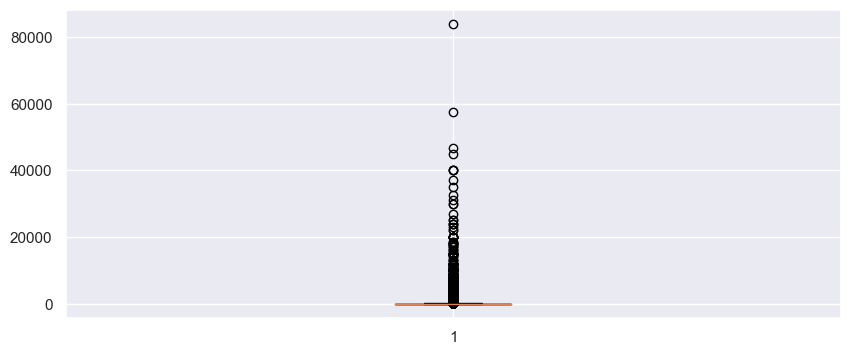

In [48]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  
fig = plt.figure(figsize =(10, 4))
plt.boxplot(Cities_EC_Top3['gastos'])

In [49]:
Cities_EC_Top3=Cities_EC_Top3[Cities_EC_Top3['gastos']<50000]
Cities_EC_Top3

,vivienda,sexo,edad,estado_civil,nivel_instruccion,categoria_ocupacional,trabajo_desempenia,cantidad_trabajos,jornada_trabajo_principal,salario_principal,gastos,ingreso_por_capital,ciudad,meses_antiguedad,SBU
0,1,1,55,1,Centro de Alfabetización/(EBA),6.0,0,1.0,20.0,1100.0,0.0,740.0,Quito,156.0,460
1,1,2,24,1,Postgrado,2.0,2.0,1.0,40.0,0.0,0.0,740.0,Quito,12.0,460
2,1,1,55,1,Centro de Alfabetización/(EBA),6.0,0,1.0,6.0,750.0,70.0,747.67,Quito,204.0,460
3,1,2,24,1,Postgrado,2.0,2.0,1.0,40.0,0.0,0.0,747.67,Quito,48.0,460
4,2,1,38,1,Bachillerato - Educación Media,6.0,0,1.0,40.0,500.0,100.0,82.6,Quito,204.0,460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43592,8,1,46,1,Bachillerato - Educación Media,2.0,2.0,1.0,40.0,0.0,0.0,701.33,Guayaquil,168.0,460
43593,9,1,28,1,Bachillerato - Educación Media,2.0,2.0,1.0,40.0,0.0,0.0,113.75,Guayaquil,96.0,460
43594,10,2,45,5,Bachillerato - Educación Media,10.0,2.0,1.0,40.0,0.0,0.0,207.0,Guayaquil,72.0,460
43595,10,1,70,6,Secundario,6.0,0,1.0,40.0,400.0,0.0,207.0,Guayaquil,480.0,460


Observamos que ya no tenemos outlier para gastos

{'whiskers': [<matplotlib.lines.Line2D at 0x1c9b610f460>,
 'caps': [<matplotlib.lines.Line2D at 0x1c9b610f9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c9b610f1c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c9b610fee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c9b60b81c0>],
 'means': []}

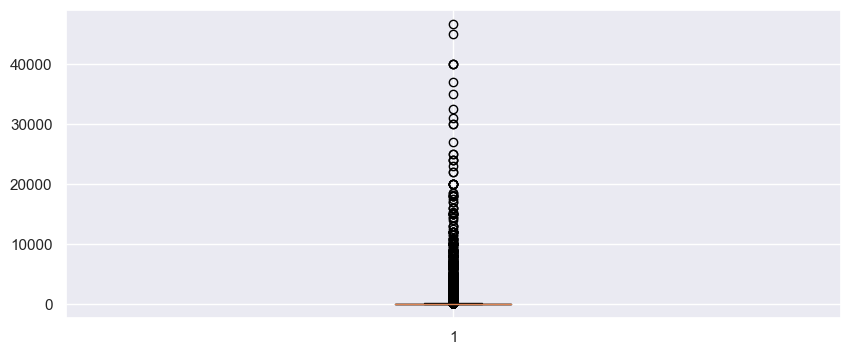

In [50]:
%matplotlib inline  
fig = plt.figure(figsize =(10, 4))
plt.boxplot(Cities_EC_Top3['gastos'])

### Correlación

Analizamos las variables que presentan una correlación lineal superior al 70%. Observamos que hay dos variables numéricas que están altamente correlacionadas entre sí.

In [51]:
fs = FeatureSelector(data = Cities_EC_Top3, labels = Cities_EC_Top3.columns)

In [52]:
fs.identify_collinear(correlation_threshold=0.7)

1 features with a correlation magnitude greater than 0.70.



C:\Users\Franklin\TFM_MBID_VIU_2023_MODELO\feature_selector.py:192: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Franklin\TFM_MBID_VIU_2023_MODELO\feature_selector.py:222: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



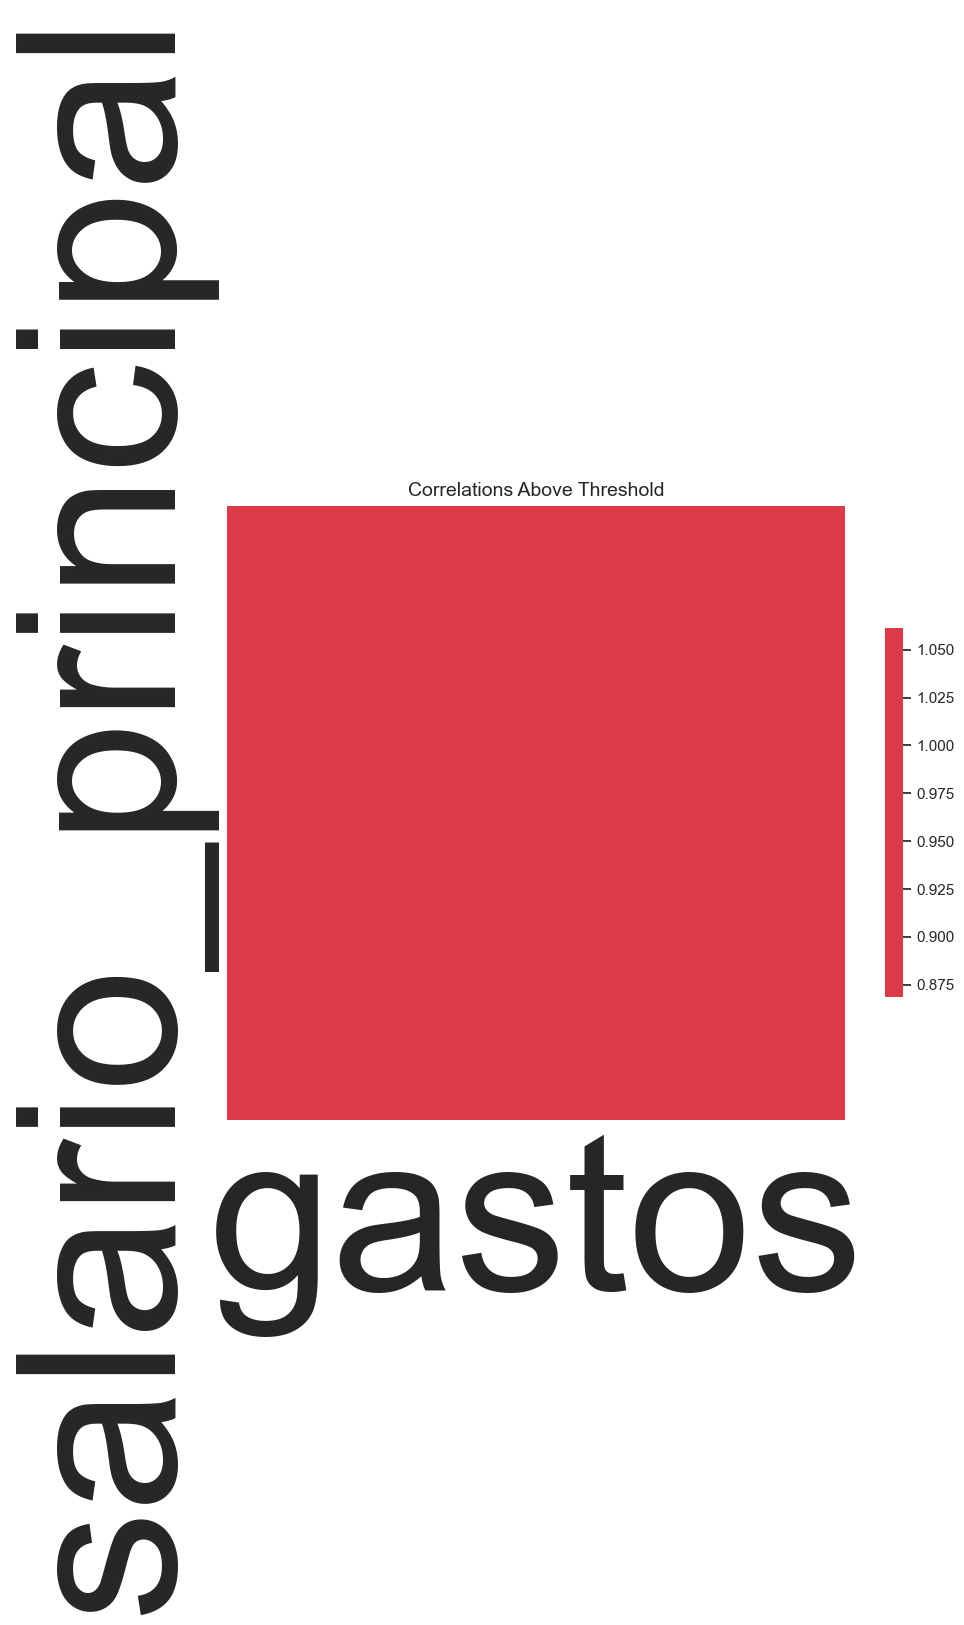

In [53]:
fs.plot_collinear() 

In [54]:
collinear_features = fs.ops['collinear']
collinear=fs.record_collinear
collinear.sort_values(by='corr_value', ascending=False)

,drop_feature,corr_feature,corr_value
0,gastos,salario_principal,0.964971


Las dos variables altamente correlacionadas son gastos y salario_principal, y están directamente asociadas entre sí. Esto será considerado para su eliminación en uno de los pasos finales, después de haber analizado más el dataset, ya que su presencia sería redundante una vez que se agreguen las demás variables de tablas externas.

Eliminamos las variables con una correlación lineal superior al 90%. La información de la correlación la hemos sacado anteriormente

In [86]:
Cities_EC_Top3 = Cities_EC_Top3.drop(['gastos'], axis = 1)

# Modelo de prestamos para BGR

Ahora procederé a agregar variables adicionales a nuestro conjunto de datos para enriquecer nuestra predicción y obtener conclusiones más sólidas basadas en un conjunto más amplio de variables significativas.

In [55]:
Banks_EC_Top2.loc[Banks_EC_Top2['banco'] == 'BGR']

,requisitos_dependientes,banco
0,Certificado de trabajo y roles de pago de los ...,BGR
1,Copia a color de cédula de identidad.,BGR
2,"Copia de planilla servicios básicos, internet ...",BGR
3,Edad entre 25 años y 65 años,BGR
4,Minimo 12 meses de antigüedad,BGR
5,Salario mínimo de 1100 dólares,BGR


#### Ayuda de un experto para aprobar o rechazar un prestamo en Banco General Rumiñahui

Ahora procedemos a agregar variables adicionales a nuestro conjunto de datos para enriquecer nuestra predicción y obtener conclusiones más sólidas basadas en un conjunto más amplio de variables significativas.

#### Requisitos para prestamo en BGR
- Edad entre 25 años y 65 años
- Minimo 12 meses de antigüedad
- Salario mínimo de 1100 dólares
- Porcentaje de gasto personales 20%

In [56]:
Cities_EC_Top3_BGR = Cities_EC_Top3.copy()
Cities_EC_Top3_BGR['estado_prestamo']= np.where((Cities_EC_Top3['meses_antiguedad'] > 12)
                          & (Cities_EC_Top3['salario_principal'] > 1100) 
                          & (Cities_EC_Top3['edad'] <= 65)
                          & (Cities_EC_Top3['edad'] >= 25)
                          , 'Aprobado', 'Rechazado');
Cities_EC_Top3_BGR


,vivienda,sexo,edad,estado_civil,nivel_instruccion,categoria_ocupacional,trabajo_desempenia,cantidad_trabajos,jornada_trabajo_principal,salario_principal,gastos,ingreso_por_capital,ciudad,meses_antiguedad,SBU,estado_prestamo
0,1,1,55,1,Centro de Alfabetización/(EBA),6.0,0,1.0,20.0,1100.0,0.0,740.0,Quito,156.0,460,Rechazado
1,1,2,24,1,Postgrado,2.0,2.0,1.0,40.0,0.0,0.0,740.0,Quito,12.0,460,Rechazado
2,1,1,55,1,Centro de Alfabetización/(EBA),6.0,0,1.0,6.0,750.0,70.0,747.67,Quito,204.0,460,Rechazado
3,1,2,24,1,Postgrado,2.0,2.0,1.0,40.0,0.0,0.0,747.67,Quito,48.0,460,Rechazado
4,2,1,38,1,Bachillerato - Educación Media,6.0,0,1.0,40.0,500.0,100.0,82.6,Quito,204.0,460,Rechazado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43592,8,1,46,1,Bachillerato - Educación Media,2.0,2.0,1.0,40.0,0.0,0.0,701.33,Guayaquil,168.0,460,Rechazado
43593,9,1,28,1,Bachillerato - Educación Media,2.0,2.0,1.0,40.0,0.0,0.0,113.75,Guayaquil,96.0,460,Rechazado
43594,10,2,45,5,Bachillerato - Educación Media,10.0,2.0,1.0,40.0,0.0,0.0,207.0,Guayaquil,72.0,460,Rechazado
43595,10,1,70,6,Secundario,6.0,0,1.0,40.0,400.0,0.0,207.0,Guayaquil,480.0,460,Rechazado


Agrupar el sultado del dataset por creditos aprobado y reprobajo

In [57]:
Cities_EC_Top3_BGR.groupby(["estado_prestamo"], sort=True).size()

estado_prestamo
Aprobado      2597
Rechazado    40899
dtype: int64

Se procede a realizar un respaldo de la información de modelo de BGR

In [58]:
Cities_EC_Top3_BGR.to_excel(data_path_backup + 'Backup_Cities_EC_Top3_BGR' + type_file , index = False)

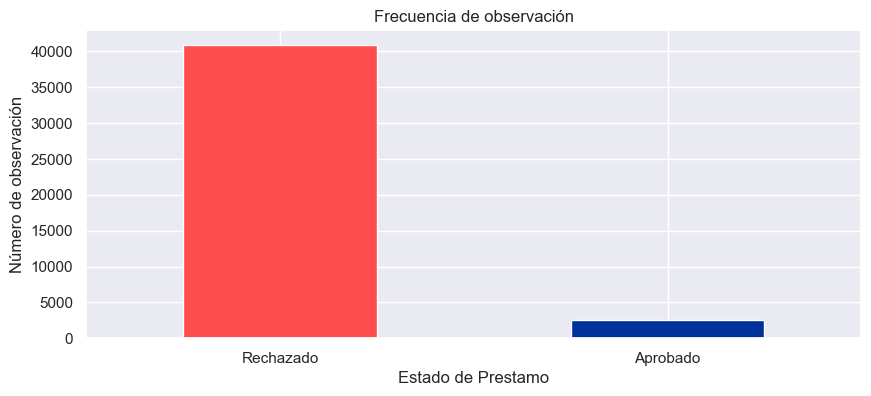

In [59]:
LABELS= ['Rechazado','Aprobado']
count_classes = Cities_EC_Top3_BGR.value_counts(Cities_EC_Top3_BGR['estado_prestamo'], sort = True)
count_classes.plot(kind = 'bar', rot=0, color=['#ff4d4d', '#003399'], figsize=(10, 4))
plt.xticks(range(2), LABELS)
plt.title("Frecuencia de observación")
plt.xlabel("Estado de Prestamo")
plt.ylabel("Número de observación");

In [60]:
Cities_EC_Top3_BGR

,vivienda,sexo,edad,estado_civil,nivel_instruccion,categoria_ocupacional,trabajo_desempenia,cantidad_trabajos,jornada_trabajo_principal,salario_principal,gastos,ingreso_por_capital,ciudad,meses_antiguedad,SBU,estado_prestamo
0,1,1,55,1,Centro de Alfabetización/(EBA),6.0,0,1.0,20.0,1100.0,0.0,740.0,Quito,156.0,460,Rechazado
1,1,2,24,1,Postgrado,2.0,2.0,1.0,40.0,0.0,0.0,740.0,Quito,12.0,460,Rechazado
2,1,1,55,1,Centro de Alfabetización/(EBA),6.0,0,1.0,6.0,750.0,70.0,747.67,Quito,204.0,460,Rechazado
3,1,2,24,1,Postgrado,2.0,2.0,1.0,40.0,0.0,0.0,747.67,Quito,48.0,460,Rechazado
4,2,1,38,1,Bachillerato - Educación Media,6.0,0,1.0,40.0,500.0,100.0,82.6,Quito,204.0,460,Rechazado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43592,8,1,46,1,Bachillerato - Educación Media,2.0,2.0,1.0,40.0,0.0,0.0,701.33,Guayaquil,168.0,460,Rechazado
43593,9,1,28,1,Bachillerato - Educación Media,2.0,2.0,1.0,40.0,0.0,0.0,113.75,Guayaquil,96.0,460,Rechazado
43594,10,2,45,5,Bachillerato - Educación Media,10.0,2.0,1.0,40.0,0.0,0.0,207.0,Guayaquil,72.0,460,Rechazado
43595,10,1,70,6,Secundario,6.0,0,1.0,40.0,400.0,0.0,207.0,Guayaquil,480.0,460,Rechazado


### Entrenamiento del modelo de regresión logistica para Banco General Rumiñahui

Se procede al entranamiento de modelo de regresión logistica

In [61]:
Cities_EC_Top3_BGR = Cities_EC_Top3_BGR.drop(["ciudad"], axis = 1)
Cities_EC_Top3_BGR = Cities_EC_Top3_BGR.drop(["nivel_instruccion"], axis = 1)
Cities_EC_Top3_BGR.estado_prestamo = Cities_EC_Top3_BGR.estado_prestamo.replace({"Rechazado":0, "Aprobado":1})

In [62]:
# Definimos nuestras etiquetas y features para el modelo de BGR de regresion logistica
y = Cities_EC_Top3_BGR['estado_prestamo']
X = Cities_EC_Top3_BGR.drop('estado_prestamo', axis=1)

# Segmentamos el dataset en entrenamiento y test en 70% para el entreanamiento y 30% para testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [63]:
# Creamos una función para generar el modelo que usaremos cada vez
def run_model(X_train, X_test, y_train, y_test):    
    clf_base = LogisticRegression(C=1.0, penalty='l2', random_state=1, solver="saga", max_iter=5000)
    clf_base.fit(X_train, y_train)
    return clf_base


In [64]:
# Ejecutamos del modelo
model = run_model(X_train, X_test, y_train, y_test)


### Modelo de regresión logistica

Desarrollo del modelo usando regresión logistica 

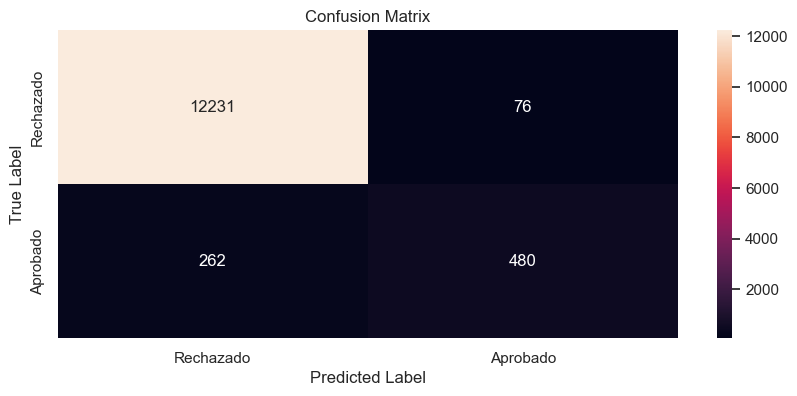

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     12307
           1       0.86      0.65      0.74       742

    accuracy                           0.97     13049
   macro avg       0.92      0.82      0.86     13049
weighted avg       0.97      0.97      0.97     13049



In [65]:
# Definimos la funcion para mostrar los resultados
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(10, 4))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    print (classification_report(y_test, pred_y))
 
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)


### Estrategia: Penalización para compensar

En el modelo de Regresión Logística, hemos optado por incluir un parámetro adicional llamado "weight" y establecer su valor como "balanced". Esta configuración permite que el algoritmo maneje el desbalance de clases, dando más peso a la clase minoritaria durante el proceso de entrenamiento. De esta manera, el modelo puede aprender de manera más equilibrada y mejorar su capacidad para clasificar correctamente las instancias de la clase minoritaria.

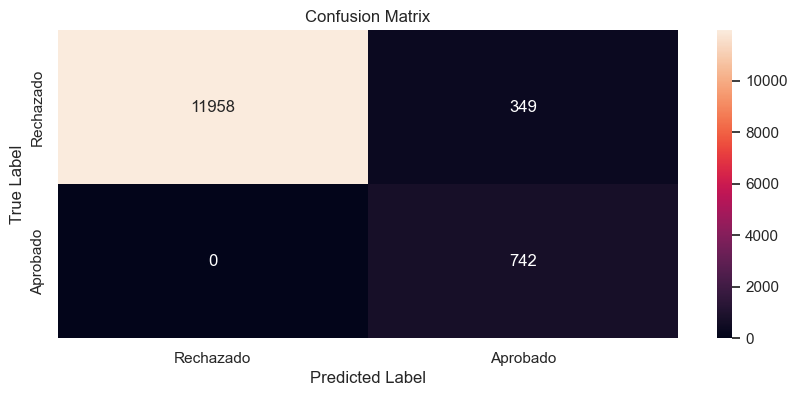

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     12307
           1       0.68      1.00      0.81       742

    accuracy                           0.97     13049
   macro avg       0.84      0.99      0.90     13049
weighted avg       0.98      0.97      0.98     13049



In [66]:
def run_model_balanced(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(C=1.0,penalty='l2', random_state=1, solver="saga", class_weight="balanced", max_iter=5000 )
    clf.fit(X_train, y_train)
    return clf
 
model = run_model_balanced(X_train, X_test, y_train, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

### Estrategia: Oversampling de la clase minoritaria

En este caso, produciremos muestras "sintéticas" nuevas de la clase minoritaria. utilizando RandomOverSampler Y observamos un aumento de 1858 muestras de fraude a 14329.

Distribución antes de remuestreo Counter({0: 28592, 1: 1855})
Distribución despues de remuestreo Counter({0: 28592, 1: 14296})


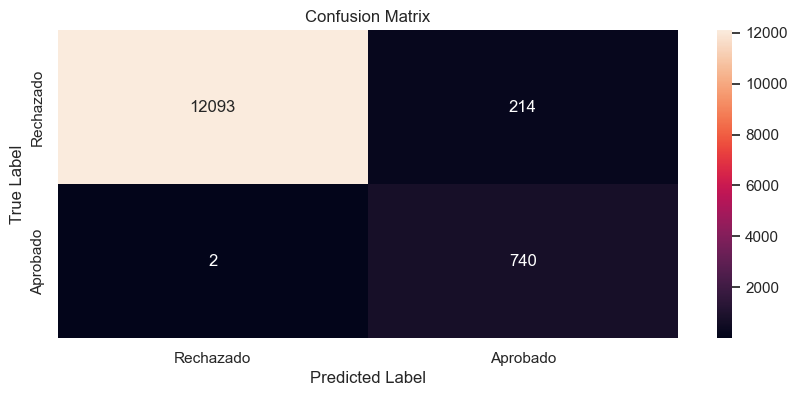

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     12307
           1       0.78      1.00      0.87       742

    accuracy                           0.98     13049
   macro avg       0.89      0.99      0.93     13049
weighted avg       0.99      0.98      0.98     13049



In [67]:
os =  RandomOverSampler(sampling_strategy=0.5)
X_train_res, y_train_res = os.fit_resample(X_train, y_train)
 
print ("Distribución antes de remuestreo {}".format(Counter(y_train)))
print ("Distribución despues de remuestreo {}".format(Counter(y_train_res)))
 
model = run_model(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

### Estrategia: Combinamos resampling con Smote-Tomek

Ahora veremos una estrategia muy utilizada que consiste en aplicar simultáneamente un algoritmo de subsampling y otro de oversampling al conjunto de datos. En este caso, utilizaremos SMOTE para el sobresampling: busca puntos cercanos y agrega puntos "en linea recta" entre ellos. Y usaremos Tomek para el muestreo inferior, que elimina los de distinta clase que son los vecinos más cercanos y permite una mejor comprensión del límite de decisión (la zona limítrofe de nuestras clases).

Distribución antes de remuestreo Counter({0: 28592, 1: 1855})
Distribución despues de remuestreo Counter({0: 28583, 1: 14287})


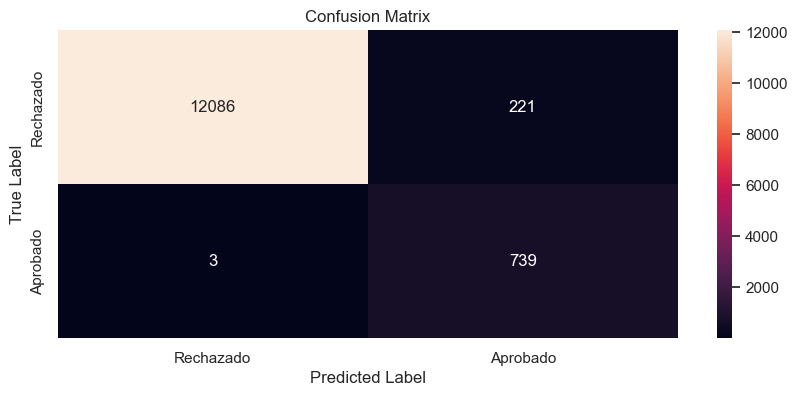

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     12307
           1       0.77      1.00      0.87       742

    accuracy                           0.98     13049
   macro avg       0.88      0.99      0.93     13049
weighted avg       0.99      0.98      0.98     13049



In [68]:
os_us = SMOTETomek(sampling_strategy=0.5)
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)
 
print ("Distribución antes de remuestreo {}".format(Counter(y_train)))
print ("Distribución despues de remuestreo {}".format(Counter(y_train_res)))
 
model = run_model(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

### Estrategia: Ensamble de Modelos con Balanceo

Para esta estrategia usaremos un Clasificador de Ensamble que utiliza Bagging y el modelo será un DecisionTree.

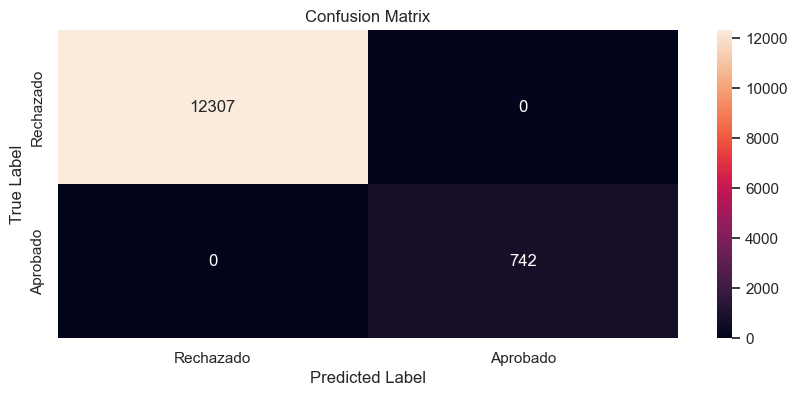

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12307
           1       1.00      1.00      1.00       742

    accuracy                           1.00     13049
   macro avg       1.00      1.00      1.00     13049
weighted avg       1.00      1.00      1.00     13049



In [69]:
bbc = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
 
#Train the classifier.
bbc.fit(X_train, y_train)
pred_y = bbc.predict(X_test)
mostrar_resultados(y_test, pred_y)

# Modelo de prestamos para Banco de Pacifico

Ahora procederé a agregar variables adicionales a nuestro conjunto de datos para enriquecer nuestra predicción y obtener conclusiones más sólidas basadas en un conjunto más amplio de variables significativas.

In [70]:
Banks_EC_Top2.loc[Banks_EC_Top2['banco'] == 'Pacifico']

,requisitos_dependientes,banco
7,"Si tiene otros ingresos, presentar los soporte...",Pacifico
8,Copia de cédula de ciudadanía legible y vigent...,Pacifico
9,Copia de planilla de servicio de básico de su ...,Pacifico
10,Edad entre 22 años y 60 años,Pacifico
11,Minimo 15 meses de antigüedad,Pacifico
12,Salario mínimo de 900 dólares,Pacifico


#### Ayuda de un experto para aprobar o rechazar un prestamo en Banco Pacifico

Ahora procedemos a agregar variables adicionales a nuestro conjunto de datos para enriquecer nuestra predicción y obtener conclusiones más sólidas basadas en un conjunto más amplio de variables significativas.

#### Requisitos para prestamo en Pacifico
- Edad entre 22 años y 60 años
- Minimo 15 meses de antigüedad
- Salario mínimo de 900 dólares
- Porcentaje de gasto personales 20%

In [71]:
Cities_EC_Top3_Pacifico = Cities_EC_Top3.copy()
Cities_EC_Top3_Pacifico['estado_prestamo']= np.where((Cities_EC_Top3['meses_antiguedad'] > 15)
                          & (Cities_EC_Top3['salario_principal'] > 900) 
                          & (Cities_EC_Top3['edad'] <= 60)
                          & (Cities_EC_Top3['edad'] >= 22)
                          , 'Aprobado', 'Rechazado');
Cities_EC_Top3_Pacifico

,vivienda,sexo,edad,estado_civil,nivel_instruccion,categoria_ocupacional,trabajo_desempenia,cantidad_trabajos,jornada_trabajo_principal,salario_principal,gastos,ingreso_por_capital,ciudad,meses_antiguedad,SBU,estado_prestamo
0,1,1,55,1,Centro de Alfabetización/(EBA),6.0,0,1.0,20.0,1100.0,0.0,740.0,Quito,156.0,460,Aprobado
1,1,2,24,1,Postgrado,2.0,2.0,1.0,40.0,0.0,0.0,740.0,Quito,12.0,460,Rechazado
2,1,1,55,1,Centro de Alfabetización/(EBA),6.0,0,1.0,6.0,750.0,70.0,747.67,Quito,204.0,460,Rechazado
3,1,2,24,1,Postgrado,2.0,2.0,1.0,40.0,0.0,0.0,747.67,Quito,48.0,460,Rechazado
4,2,1,38,1,Bachillerato - Educación Media,6.0,0,1.0,40.0,500.0,100.0,82.6,Quito,204.0,460,Rechazado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43592,8,1,46,1,Bachillerato - Educación Media,2.0,2.0,1.0,40.0,0.0,0.0,701.33,Guayaquil,168.0,460,Rechazado
43593,9,1,28,1,Bachillerato - Educación Media,2.0,2.0,1.0,40.0,0.0,0.0,113.75,Guayaquil,96.0,460,Rechazado
43594,10,2,45,5,Bachillerato - Educación Media,10.0,2.0,1.0,40.0,0.0,0.0,207.0,Guayaquil,72.0,460,Rechazado
43595,10,1,70,6,Secundario,6.0,0,1.0,40.0,400.0,0.0,207.0,Guayaquil,480.0,460,Rechazado


In [72]:
Cities_EC_Top3_Pacifico.groupby(["estado_prestamo"], sort=True).size()

estado_prestamo
Aprobado      3016
Rechazado    40480
dtype: int64

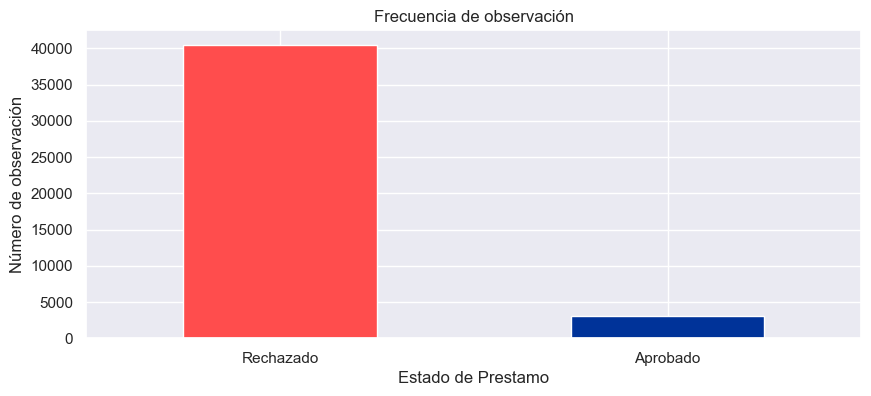

In [73]:
LABELS= ['Rechazado','Aprobado']
count_classes = Cities_EC_Top3_Pacifico.value_counts(Cities_EC_Top3_Pacifico['estado_prestamo'], sort = True)
count_classes.plot(kind = 'bar', rot=0, color=['#ff4d4d', '#003399'])
plt.xticks(range(2), LABELS)
plt.title("Frecuencia de observación")
plt.xlabel("Estado de Prestamo")
plt.ylabel("Número de observación");

In [74]:
Cities_EC_Top3_Pacifico

,vivienda,sexo,edad,estado_civil,nivel_instruccion,categoria_ocupacional,trabajo_desempenia,cantidad_trabajos,jornada_trabajo_principal,salario_principal,gastos,ingreso_por_capital,ciudad,meses_antiguedad,SBU,estado_prestamo
0,1,1,55,1,Centro de Alfabetización/(EBA),6.0,0,1.0,20.0,1100.0,0.0,740.0,Quito,156.0,460,Aprobado
1,1,2,24,1,Postgrado,2.0,2.0,1.0,40.0,0.0,0.0,740.0,Quito,12.0,460,Rechazado
2,1,1,55,1,Centro de Alfabetización/(EBA),6.0,0,1.0,6.0,750.0,70.0,747.67,Quito,204.0,460,Rechazado
3,1,2,24,1,Postgrado,2.0,2.0,1.0,40.0,0.0,0.0,747.67,Quito,48.0,460,Rechazado
4,2,1,38,1,Bachillerato - Educación Media,6.0,0,1.0,40.0,500.0,100.0,82.6,Quito,204.0,460,Rechazado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43592,8,1,46,1,Bachillerato - Educación Media,2.0,2.0,1.0,40.0,0.0,0.0,701.33,Guayaquil,168.0,460,Rechazado
43593,9,1,28,1,Bachillerato - Educación Media,2.0,2.0,1.0,40.0,0.0,0.0,113.75,Guayaquil,96.0,460,Rechazado
43594,10,2,45,5,Bachillerato - Educación Media,10.0,2.0,1.0,40.0,0.0,0.0,207.0,Guayaquil,72.0,460,Rechazado
43595,10,1,70,6,Secundario,6.0,0,1.0,40.0,400.0,0.0,207.0,Guayaquil,480.0,460,Rechazado


### Entrenamiento del modelo de regresión lineal para Banco de Pacifico

Se procede al entranamiento de modelo de regresión logistica

In [75]:
Cities_EC_Top3_Pacifico = Cities_EC_Top3_Pacifico.drop(["ciudad"], axis = 1)
Cities_EC_Top3_Pacifico = Cities_EC_Top3_Pacifico.drop(["nivel_instruccion"], axis = 1)
Cities_EC_Top3_Pacifico.estado_prestamo = Cities_EC_Top3_Pacifico.estado_prestamo.replace({"Rechazado":0, "Aprobado":1})

In [76]:
# Definimos nuestras etiquetas y features para el modelo de Pacifico de regresion logistica
y = Cities_EC_Top3_Pacifico['estado_prestamo']
X = Cities_EC_Top3_Pacifico.drop('estado_prestamo', axis=1)

# Segmentamos el dataset en entrenamiento y test en 70% para el entreanamiento y 30% para testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [77]:
# Creamos una función para generar el modelo que usaremos cada vez
def run_model(X_train, X_test, y_train, y_test):    
    clf_base = LogisticRegression(C=1.0, penalty='l2', random_state=1, solver="saga", max_iter=5000)
    clf_base.fit(X_train, y_train)
    return clf_base

In [78]:
# Ejecutamos del modelo
model = run_model(X_train, X_test, y_train, y_test)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



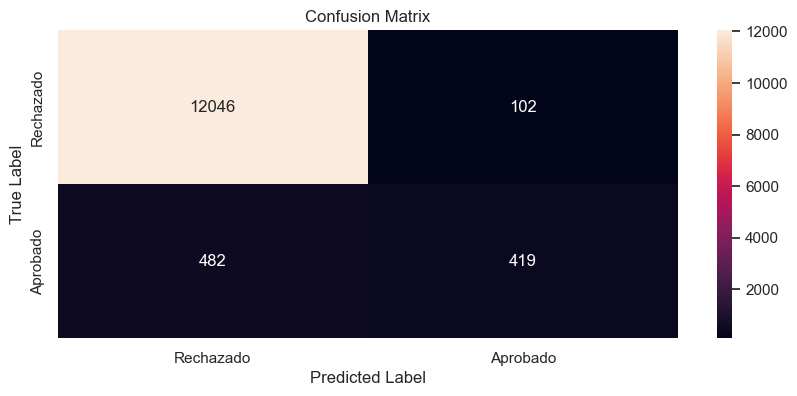

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     12148
           1       0.80      0.47      0.59       901

    accuracy                           0.96     13049
   macro avg       0.88      0.73      0.78     13049
weighted avg       0.95      0.96      0.95     13049



In [79]:
# Definimos la funcion para mostrar los resultados
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(10, 4))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    print (classification_report(y_test, pred_y))
 
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

### Estrategia: Penalización para compensar

En el modelo de Regresión Logística, hemos optado por incluir un parámetro adicional llamado "weight" y establecer su valor como "balanced". Esta configuración permite que el algoritmo maneje el desbalance de clases, dando más peso a la clase minoritaria durante el proceso de entrenamiento. De esta manera, el modelo puede aprender de manera más equilibrada y mejorar su capacidad para clasificar correctamente las instancias de la clase minoritaria.

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



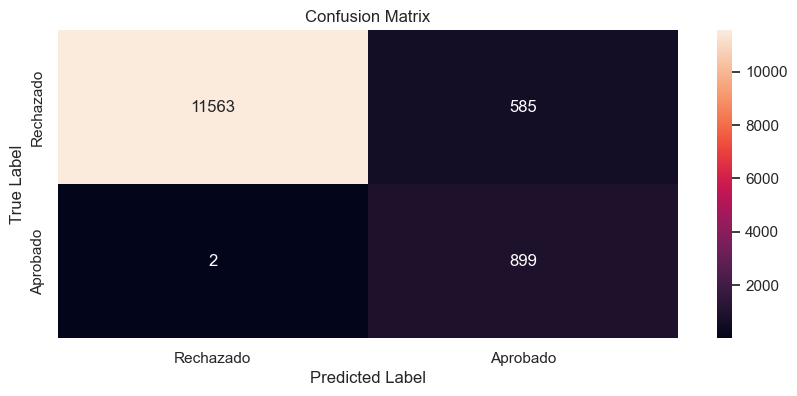

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     12148
           1       0.61      1.00      0.75       901

    accuracy                           0.96     13049
   macro avg       0.80      0.97      0.86     13049
weighted avg       0.97      0.96      0.96     13049



In [80]:
def run_model_balanced(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(C=1.0,penalty='l2', random_state=1, solver="saga", class_weight="balanced", max_iter=5000 )
    clf.fit(X_train, y_train)
    return clf
 
model = run_model_balanced(X_train, X_test, y_train, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

### Estrategia: Oversampling de la clase minoritaria

En este caso, produciremos muestras "sintéticas" nuevas de la clase minoritaria. utilizando RandomOverSampler Y observamos un aumento de 1858 muestras de fraude a 14329.

Distribución antes de remuestreo Counter({0: 28332, 1: 2115})
Distribución despues de remuestreo Counter({0: 28332, 1: 14166})


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



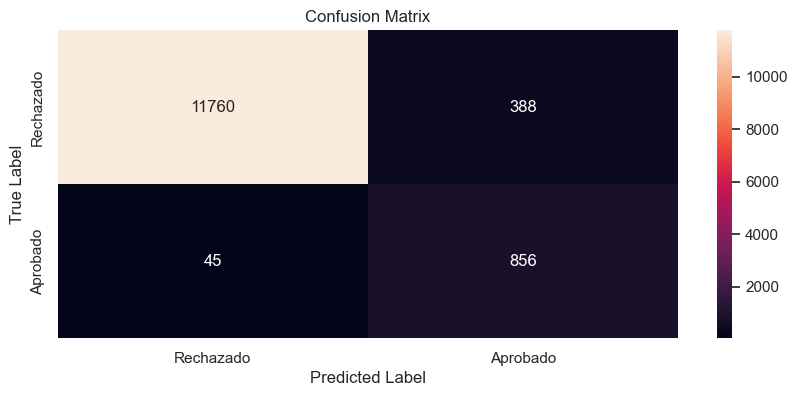

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     12148
           1       0.69      0.95      0.80       901

    accuracy                           0.97     13049
   macro avg       0.84      0.96      0.89     13049
weighted avg       0.97      0.97      0.97     13049



In [81]:
os =  RandomOverSampler(sampling_strategy=0.5)
X_train_res, y_train_res = os.fit_resample(X_train, y_train)
 
print ("Distribución antes de remuestreo {}".format(Counter(y_train)))
print ("Distribución despues de remuestreo {}".format(Counter(y_train_res)))
 
model = run_model(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

### Estrategia: Combinamos resampling con Smote-Tomek

Ahora veremos una estrategia muy utilizada que consiste en aplicar simultáneamente un algoritmo de subsampling y otro de oversampling al conjunto de datos. En este caso, utilizaremos SMOTE para el sobresampling: busca puntos cercanos y agrega puntos "en linea recta" entre ellos. Y usaremos Tomek para el muestreo inferior, que elimina los de distinta clase que son los vecinos más cercanos y permite una mejor comprensión del límite de decisión (la zona limítrofe de nuestras clases).

Distribución antes de remuestreo Counter({0: 28332, 1: 2115})
Distribución despues de remuestreo Counter({0: 28302, 1: 14136})


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



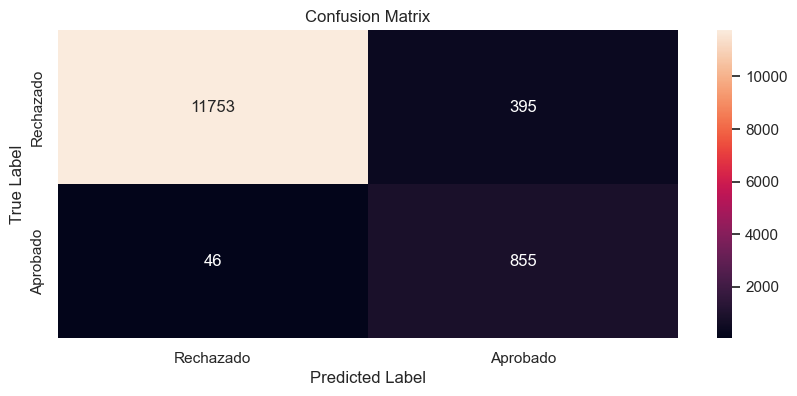

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     12148
           1       0.68      0.95      0.79       901

    accuracy                           0.97     13049
   macro avg       0.84      0.96      0.89     13049
weighted avg       0.97      0.97      0.97     13049



In [82]:
os_us = SMOTETomek(sampling_strategy=0.5)
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)
 
print ("Distribución antes de remuestreo {}".format(Counter(y_train)))
print ("Distribución despues de remuestreo {}".format(Counter(y_train_res)))
 
model = run_model(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)


### Estrategia: Ensamble de Modelos con Balanceo

Para esta estrategia usaremos un Clasificador de Ensamble que utiliza Bagging y el modelo será un DecisionTree.

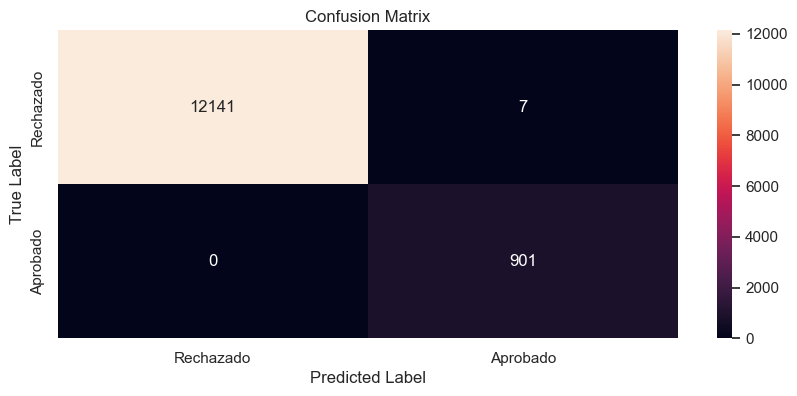

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12148
           1       0.99      1.00      1.00       901

    accuracy                           1.00     13049
   macro avg       1.00      1.00      1.00     13049
weighted avg       1.00      1.00      1.00     13049



In [83]:
bbc = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
 
#Train the classifier.
bbc.fit(X_train, y_train)
pred_y = bbc.predict(X_test)
mostrar_resultados(y_test, pred_y)

## Pipelines usando Sklearn

In [84]:
import joblib
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

# Definimos nuestras etiquetas y features para el modelo de Pacifico de regresion logistica
y = Cities_EC_Top3_Pacifico['estado_prestamo']
X = Cities_EC_Top3_Pacifico.drop('estado_prestamo', axis=1)

# Segmentamos el dataset en entrenamiento y test en 70% para el entreanamiento y 30% para testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Construct some pipelines
# Logistic Regression
pipe_lr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)), ('clf', LogisticRegression(random_state=42))])

# Decision Tree Classifier
pipe_dt = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)), ('clf', tree.DecisionTreeClassifier(random_state=42))])

# List of pipelines for ease of iteration
pipelines = [pipe_lr, pipe_dt]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)
    
# Compare accuracies
for idx, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' % (pipe_dict[idx], val.score(X_test, y_test)))
    
# Identify the most accurate model on test data
best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipelines):
    if val.score(X_test, y_test) > best_acc:
        best_acc = val.score(X_test, y_test)
        best_pipe = val
        best_clf = idx
print('Clasificación con el mejor accuracy: %s' % pipe_dict[best_clf])

# Save pipeline to file
joblib.dump(best_pipe, 'best_pipeline.pkl', compress=1)
print('Guardar %s pipeline en el archivo' % pipe_dict[best_clf])

Logistic Regression pipeline test accuracy: 0.941
Decision Tree pipeline test accuracy: 0.941
Clasificación con el mejor accuracy: Logistic Regression
Guardar Logistic Regression pipeline en el archivo
